<div style="font-size: 20px; font-weight: bold;">
     Final Phase 3 Project Submission
     <br><br>
     Student name: GEOFFREY MWANGI WACHIRA
     <br><br>
     Student pace: Part-time
     <br><br>
     Instructor name: Winnie Anyoso
</div>

# Business Problem Overview

Customer churn, the rate at which customers stop using a company’s services, is a critical issue in the telecom industry, where unlike the broader utilities market which has a churn rate of approximately 12-15% for Western European markets, the telecommunications industry has an average churn rate of 30% to 35%. For companies like Syriatel, predicting and reducing churn is essential, as retaining existing customers is far more cost-effective than acquiring new ones.

By analyzing customer behavior across various channels, telecom companies can identify "high-risk" customers and focus retention efforts accordingly. This approach not only helps maintain market position but also drives profitability and growth. The success of Syriatel depends on effectively reducing churn and implementing strategies to retain loyal customers.

Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

Syriatel is one of the leading telecommunications companies in Syria, offering a wide range of mobile and data services to millions of customers across the country. As a key player in the telecom sector, Syriatel faces significant challenges in retaining customers due to the competitive nature of the industry. Understanding and reducing customer churn is vital for Syriatel to maintain its market position and continue providing high-quality services to its customers.

## Objective of the Study

The objective of this study is to analyze customer data to identify key factors contributing to customer churn at Syriatel. By understanding these factors, the study aims to:

Determine the percentage of customers who churn and those who remain active.


Identify patterns in customer churn based on demographics, such as gender.


Examine the correlation between churn rates and the types of services provided.


Assess which services and features are most profitable for Syriatel.


Develop predictive models to forecast high-risk customers, enabling targeted retention strategies.


The ultimate goal is to provide actionable insights that will help Syriatel reduce churn, enhance customer loyalty, and improve overall business performance.

### About dataset:

The dataset contains data on the customers of a SyriaTel company.
Each row represents a customer and the columns contain customer’s attributes which are described in the following:
- state: the state the user lives in
- account length: the number of days the user has this account
- area code: the code of the area the user lives in
- phone number: the phone number of the user
- international plan: true if the user has the international plan, otherwise false
- voice mail plan: true if the user has the voice mail plan, otherwise false
- number vmail messages: the number of voice mail messages the user has sent
- total day minutes: total number of minutes the user has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the user was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the user has been in calls during the evening
- total eve calls: total number of calls the user has done during the evening
- total eve charge: total amount of money the user was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the user has been in calls during the night
- total night calls: total number of calls the user has done during the night
- total night charge: total amount of money the user was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the user has done
- total intl charge: total amount of money the user was charged by the Telecom company for international calls
- customer service calls: number of customer service calls the user has done
- churn: true if the user terminated the contract, otherwise false

## Importing Required Libraries

In [34]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading the data

In [35]:
# Reading data from csv file and Checking the first 5 rows.
df = pd.read_csv('data.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

Data dimensionality

In [36]:
# Check shape of dataframe
df.shape

(3333, 21)

The dataset has 3333 rows and 21 columns

Feature names

In [37]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [38]:
#general information about the dataframe
df.describe() 

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [39]:
#statistics on non-numerical features
df.describe(include=["object", "bool"])

state phone number international plan voice mail plan  churn
count   3333         3333               3333            3333   3333
unique    51         3333                  2               2      2
top       WV     330-6626                 no              no  False
freq     106            1               3010            2411   2850

Feature types

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

In this section, we prepare the data for exploratory data analysis (EDA) and modeling. The following checks are performed:

- **Duplicated Rows**: Identifying and removing any duplicate entries.
- **Missing Values**: Detecting and addressing any gaps in the data.
- **Irrelevant Columns**: Removing columns that do not contribute to the analysis.


**Duplicated Rows**

In [41]:
# Check for duplicated rows
df.duplicated().sum()

0

No duplicated rows to deal with.

**Missing Values**

In [42]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values.

**Irrelevant Columns**

Phone number is part of Personally identifiable information (PII) refers to data that can be used to identify, locate, or contact individuals or establishments, or reveal the characteristics or other details about them.Also, it does not necessarily help the analysis so dropping the feature is the best thing.

In [43]:
# Removing Phone number feature 

df.drop(['phone number'],axis=1,inplace=True)


In [44]:
#Confirming the drop

df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Explanatory Data Analysis (EDA) 

In [45]:
# Checking the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Feature Types

* This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.  

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* state
* area code
* international plan
* voicemail plan

In [46]:

continuous_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categorical_cols = ['state','area code','international plan','voice mail plan']

Churn feature distribution

In [47]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [48]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

85.5% of the people did not churn (i.e., their churn value is False).
14.49% of the people did churn (i.e., their churn value is True).

### Churn vs Did not Churn representation

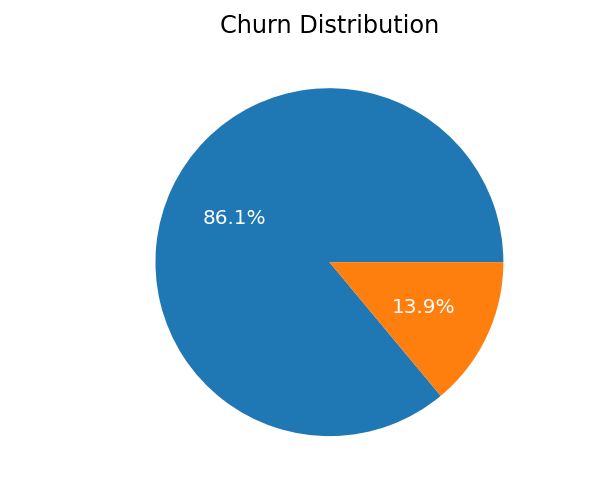

In [49]:
#Churn vs Did not Churn representation
labels = ['Did Not Churn', 'Churned']
sizes = [86.05, 13.95]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'color': 'white'})
plt.title('Churn Distribution')
plt.show()


### Average details of churned users

In [50]:
#Average details of churned users
churned_users = df[df['churn'] == True]  # Filter for churned users


average_values = churned_users.mean()

# Display the average values
print(average_values)


account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64


### Average Values of Numerical Features for Churned Users

The following table represents the average (mean) values of numerical features for users who have churned:

- **account length**: The average length of time that churned users had their accounts is about **102.52** days (or other relevant unit).
- **area code**: The average area code for churned users is **438.42**. (Note: Area codes are categorical, so this value is less meaningful).
- **number vmail messages**: On average, churned users had about **4.80** voicemail messages.
- **total day minutes**: Churned users spent an average of **209.77** minutes on daytime calls.
- **total day calls**: The average number of daytime calls made by churned users is **101.64**.
- **total day charge**: Churned users were charged an average of **$35.66** for daytime calls.
- **total eve minutes**: On average, churned users spent **213.17** minutes on evening calls.
- **total eve calls**: The average number of evening calls made by churned users is **100.52**.
- **total eve charge**: Churned users were charged an average of **$18.12** for evening calls.
- **total night minutes**: The average night minutes for churned users is **205.88** minutes.
- **total night calls**: Churned users made an average of **100.23** night calls.
- **total night charge**: Churned users were charged an average of **$9.26** for night calls.
- **total intl minutes**: Churned users spent an average of **10.74** minutes on international calls.
- **total intl calls**: The average number of international calls made by churned users is **4.01**.
- **total intl charge**: Churned users were charged an average of **$2.90** for international calls.
- **customer service calls**: On average, churned users made **2.04** calls to customer service.


This summary provides insight into the usage patterns and characteristics of customers who decided to leave the service.


**Calculating the total number of calls and charge for all users**

In [55]:
df['total_calls'] = (
    df["total day calls"]
    + df["total eve calls"]
    + df["total night calls"]
    + df["total intl calls"]
)
df["total_charge"] = (
    df["total day charge"]
    + df["total eve charge"]
    + df["total night charge"]
    + df["total intl charge"]
)

#Inserting the 'total_calls' and 'total charge' columns before the 'churn' column
churn_index = df.columns.get_loc('churn')  

# Insert 'total_calls' before 'churn'
df.insert(churn_index, 'total_calls', df.pop('total_calls'))

df.insert(churn_index + 1, 'total charge', df.pop('total charge'))


Confirming the creation of the total number of calls and charge for all users

In [56]:
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  ...  total night calls  \
0             45.07              197.4  ...                 91   
1             27.47              195.5  ...                103   
2             41.38              121.2  ...                104   
3             50.90               61.9  ...                 89   
4             28.34              148.3  ...                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  total_calls  \
0               2.70                       1  False          303   
1               3.70                       1  False          332   
2               3.29                       0  False          333   
3               1.78                       2  False          255   
4               2.73                       3  False          359   

   total_charge  total charge  
0         75.56         75.56  
1         59.24         59.24  
2         62.29         62.29  
3         66.80         66.80  
4         52.09         52.09  

[5 rows x 23 columns]

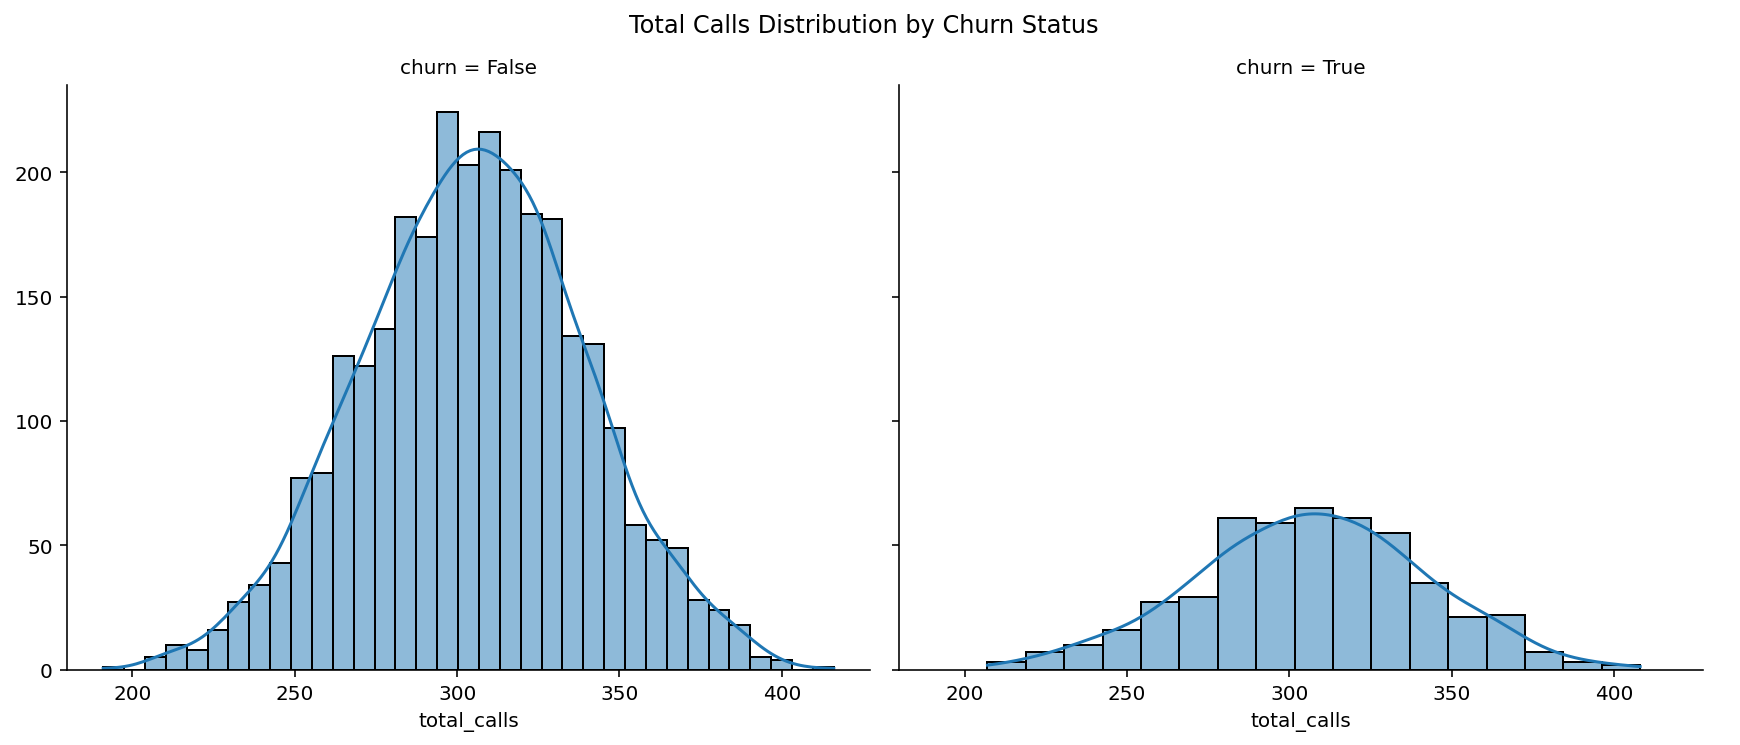

In [66]:
# Facet Grid for Total Calls
g = sns.FacetGrid(df, col="churn", height=5, aspect=1.2)
g.map(sns.histplot, "total_calls", kde=True).add_legend()
g.fig.suptitle('Total Calls Distribution by Churn Status', y=1.03)

plt.show()


**Total Calls Distribution by Churn Status**

**Non-Churned Users:**

The distribution of total calls for users who did not churn (churn = False) is symmetric and follows a normal distribution centered around 300 calls.

The spread of calls is quite wide, ranging from about 200 to 400 calls.

**Churned Users:**

For users who churned (churn = True), the distribution is also symmetric but with a lower center around 250 calls.

The distribution is narrower, suggesting that churned users tend to have fewer total calls compared to non-churned users.

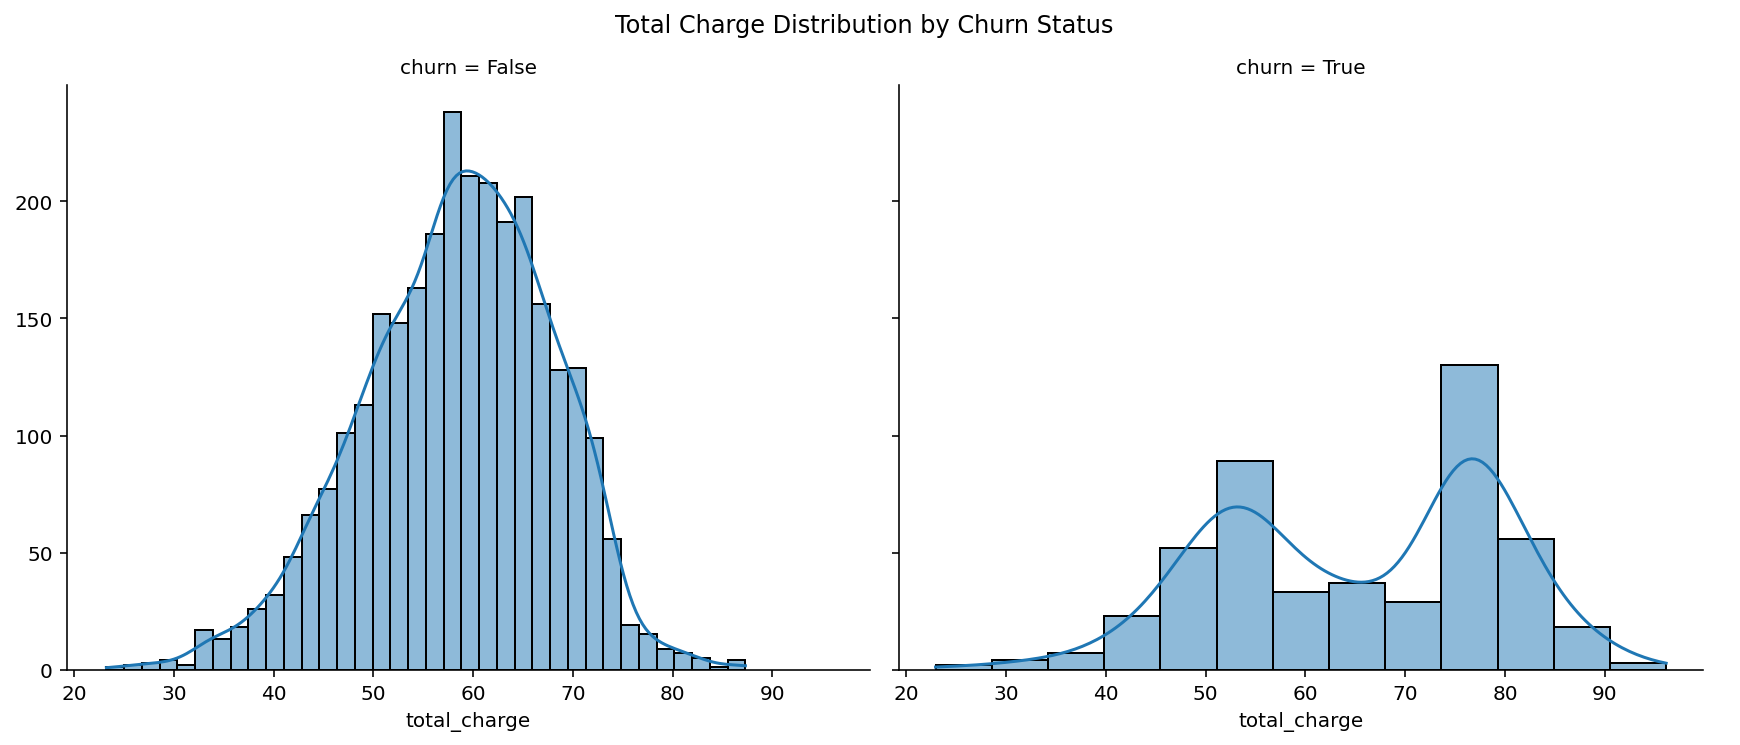

In [65]:
# Facet Grid for Total Charge
g = sns.FacetGrid(df, col="churn", height=5, aspect=1.2)
g.map(sns.histplot, "total_charge", kde=True).add_legend()
g.fig.suptitle('Total Charge Distribution by Churn Status', y=1.03)

plt.show()


**Total Charge Distribution by Churn Status**

**Non-Churned Users:**

The total charge for users who did not churn follows a fairly normal distribution, centered around 60.

The spread of charges is moderate, ranging from about 30 to 90.

**Churned Users:**

The distribution of total charges for churned users is bimodal, indicating two distinct groups within the churned users.

One group has a lower charge, and another has a higher charge. This suggests variability in the billing amounts among churned users.

International plan vs churn

<AxesSubplot:xlabel='international plan', ylabel='count'>

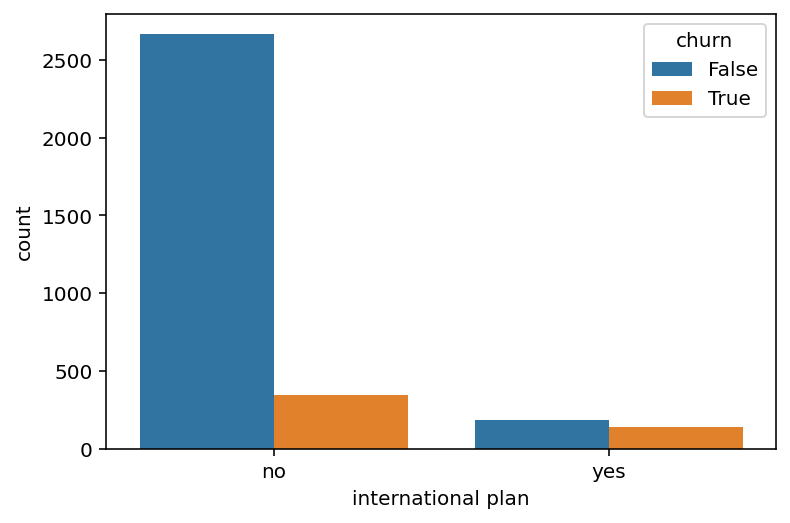

In [ ]:
sns.countplot(x="international plan", hue="churn", data=df)

Customers without an international plan are much more likely to stay (not churn) compared to those with an international plan. Additionally, the proportion of customers who churn is relatively higher among those with an international plan compared to those without one.

Churn vs Customer service calls

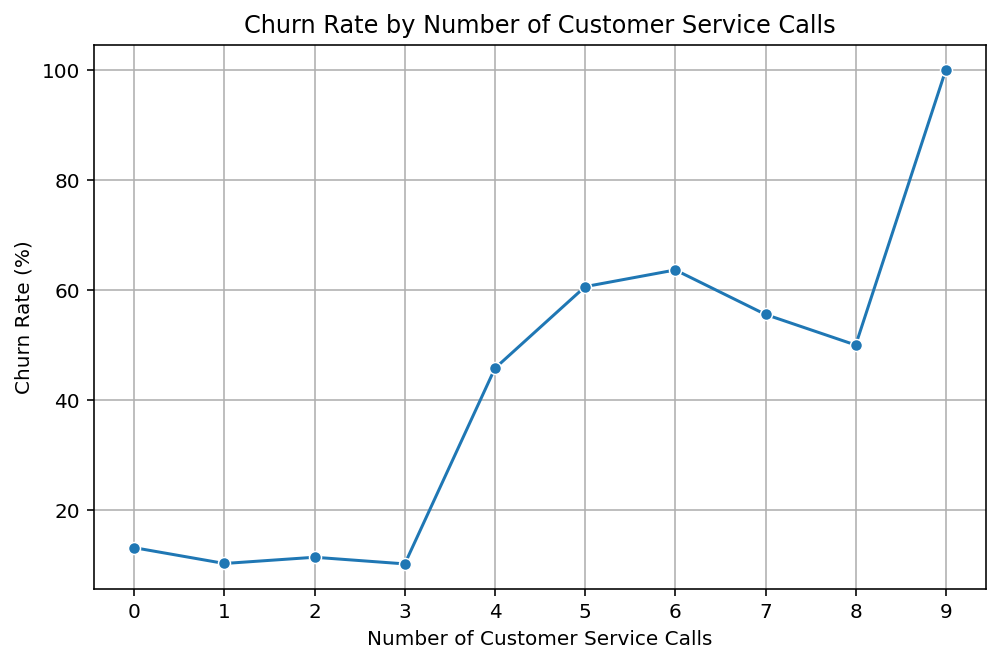

In [72]:
churn_rate = df.groupby('customer service calls')['churn'].mean() * 100

plt.figure(figsize=(8, 5))
sns.lineplot(x=churn_rate.index, y=churn_rate.values, marker='o')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_rate.index)
plt.grid(True)
plt.show()


**Conclusion:**

Low Customer Service Calls (0-3): Customers making fewer customer service calls have a relatively low churn rate, suggesting that they are generally more satisfied or have fewer issues that require frequent support interactions.

Moderate Calls (4-6): A noticeable increase in churn rate occurs when customers make between 4 to 6 calls, indicating potential dissatisfaction or unresolved issues that might lead them to consider leaving.

High Calls (9): A 100% churn rate at 9 calls strongly suggests that customers who need to make many service calls are likely highly dissatisfied, facing significant unresolved issues, or have exhausted all avenues for resolving their concerns through customer service.

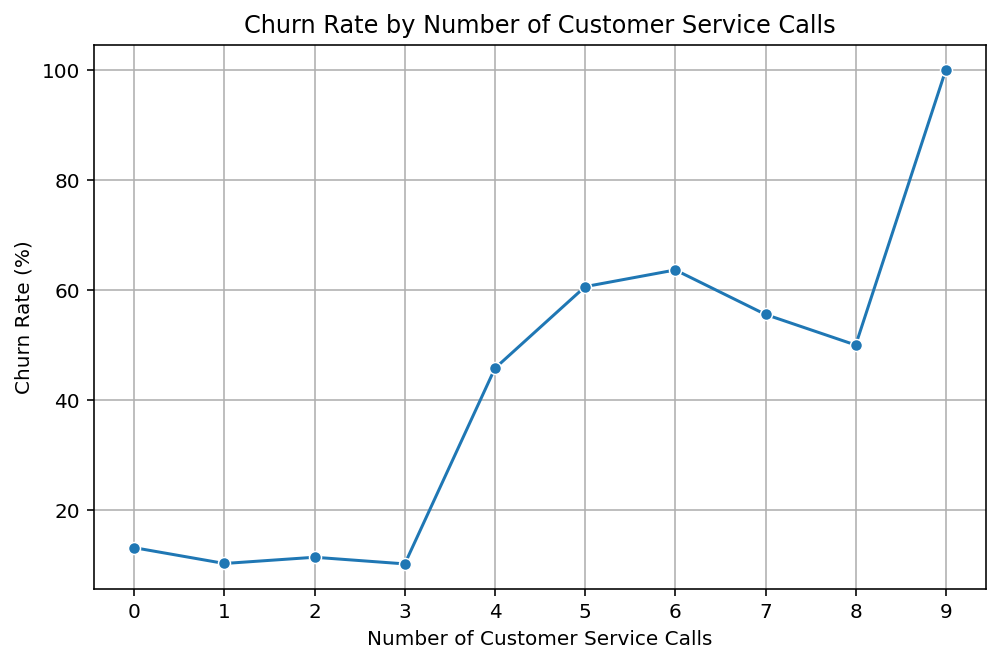

In [71]:
#

# Univariate Analysis

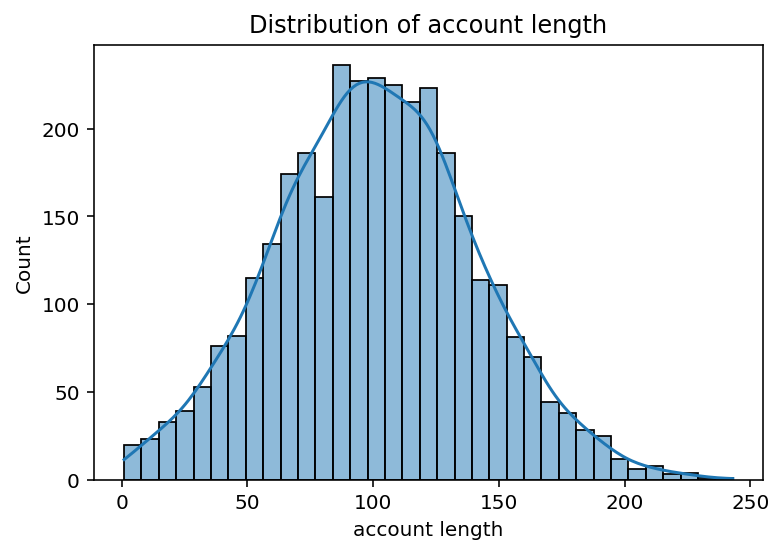

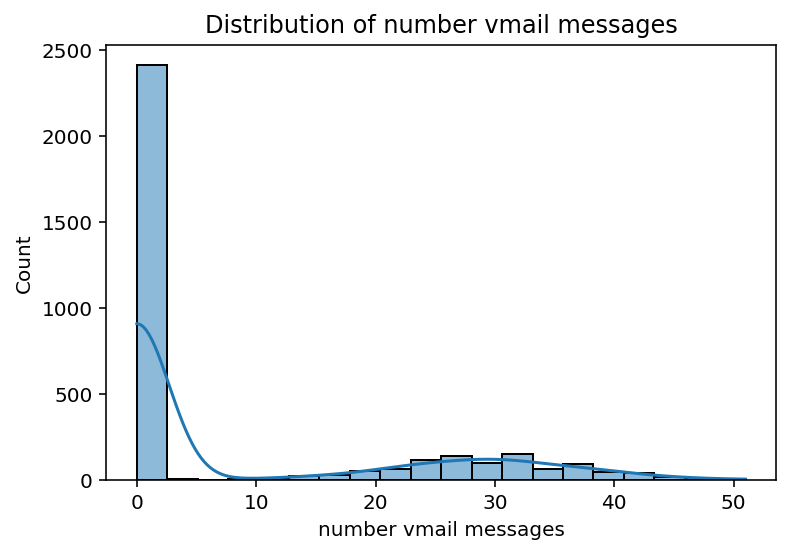

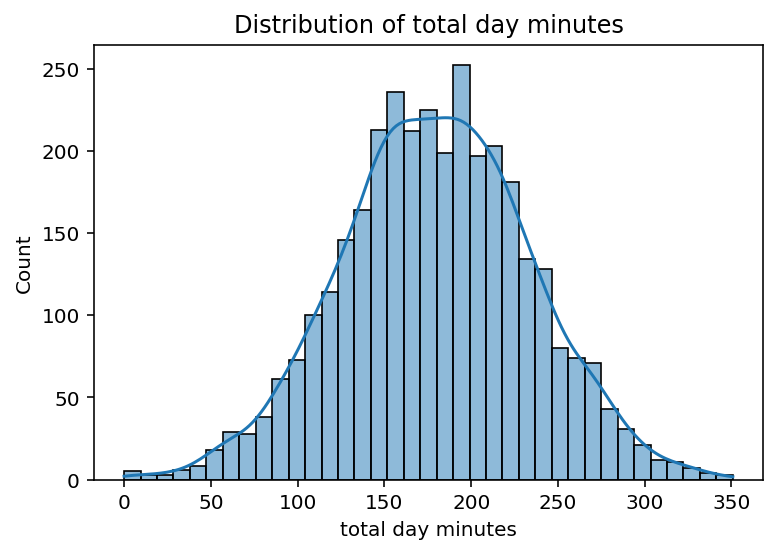

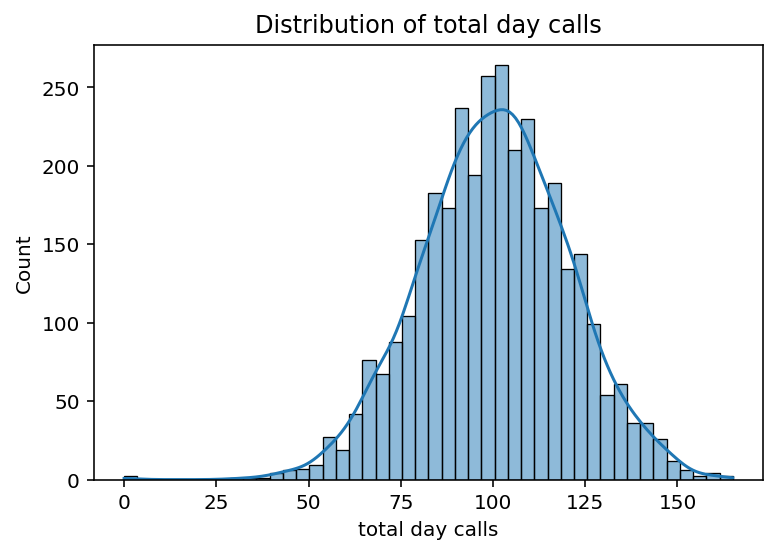

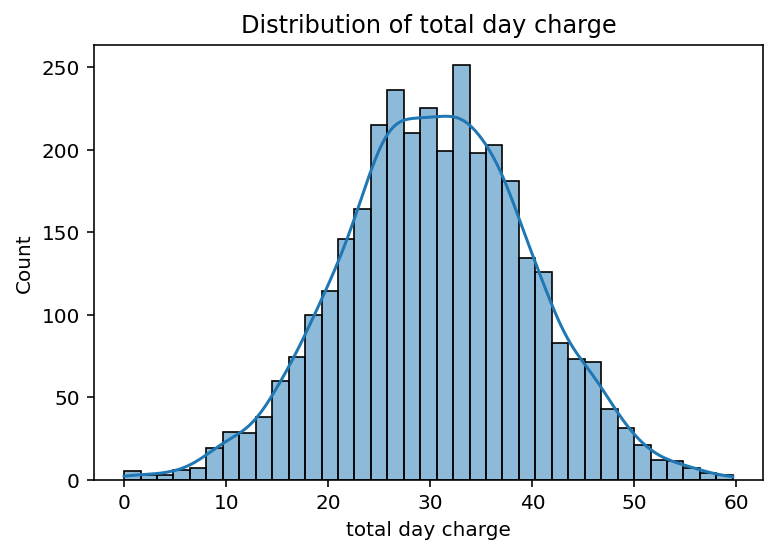

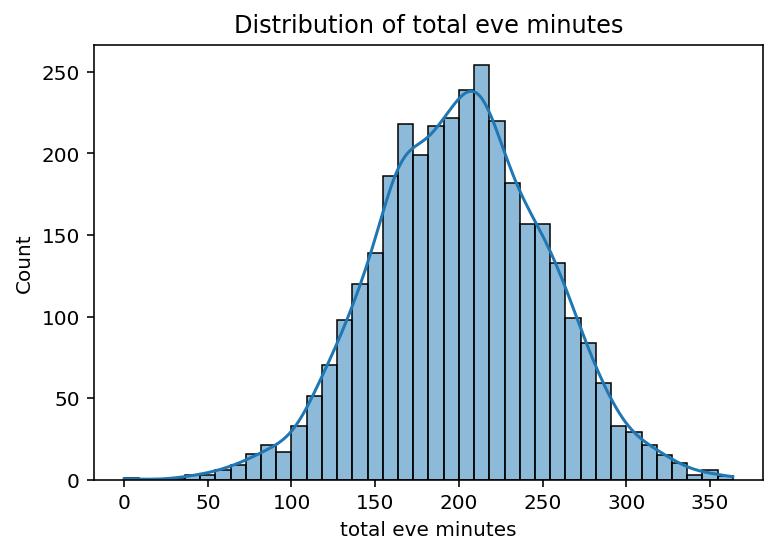

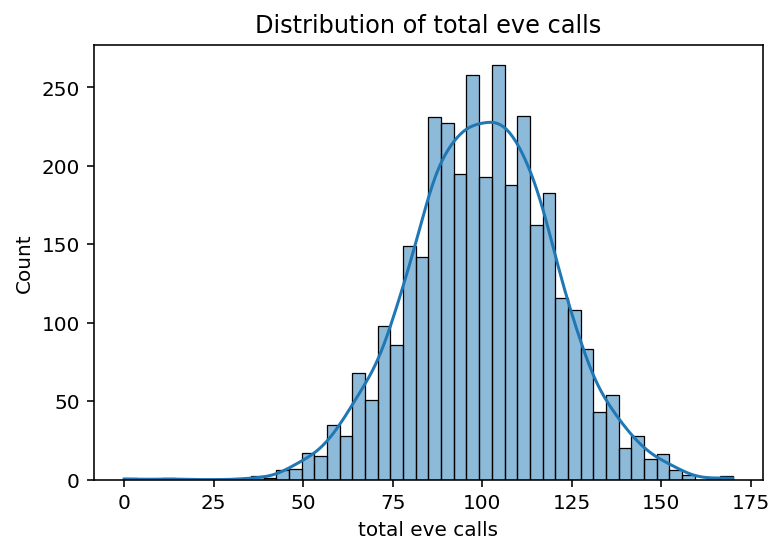

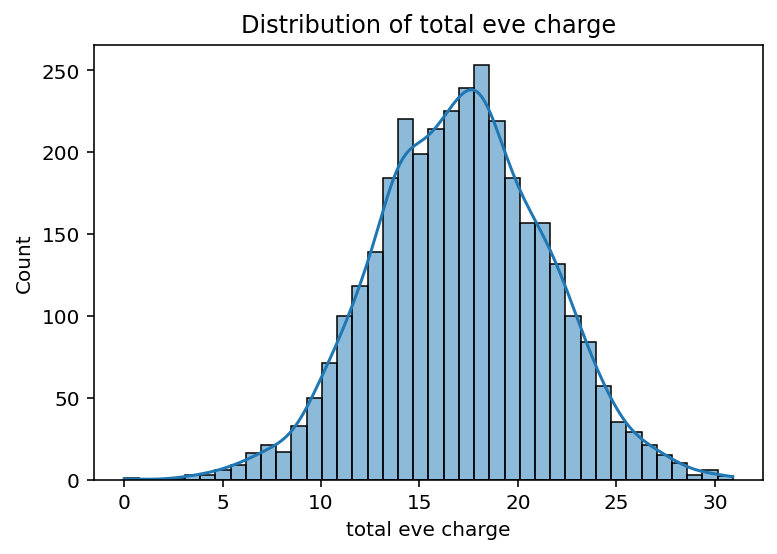

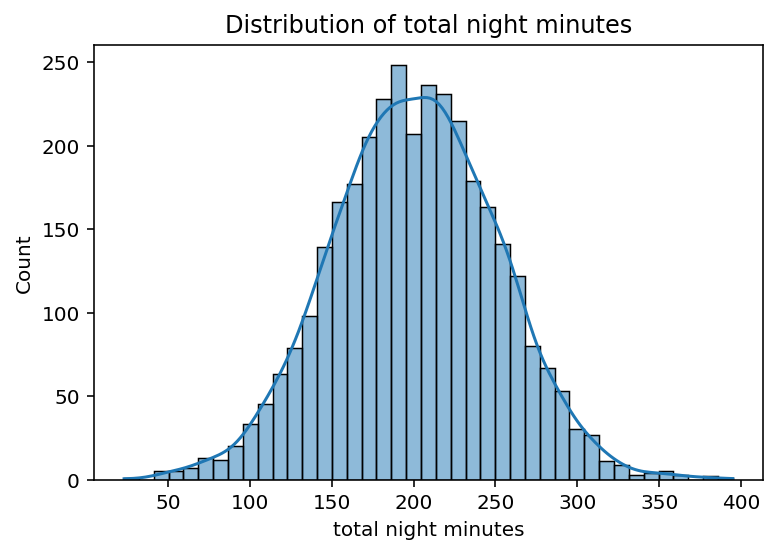

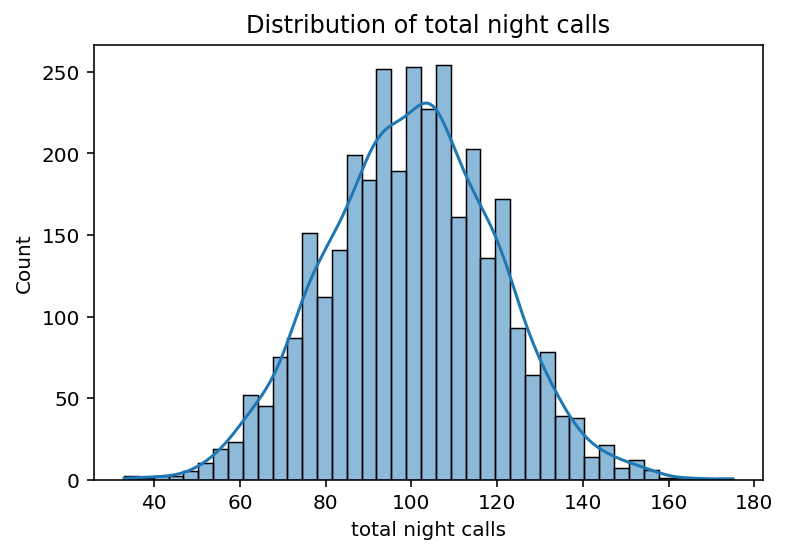

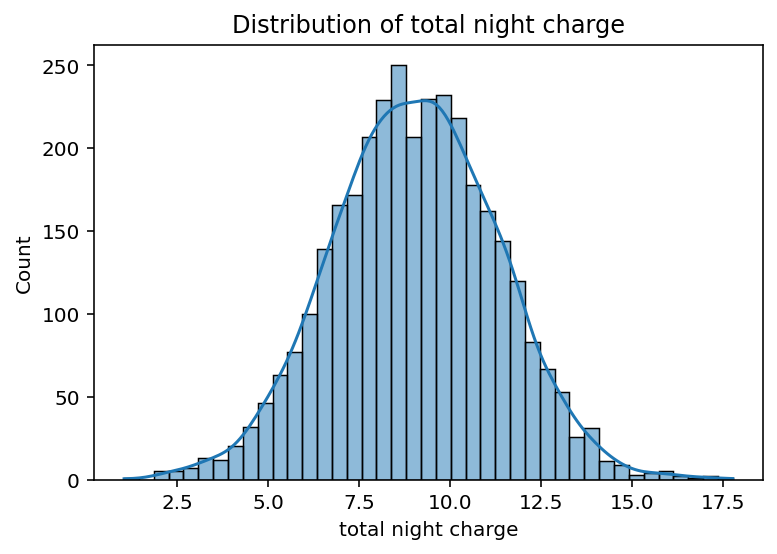

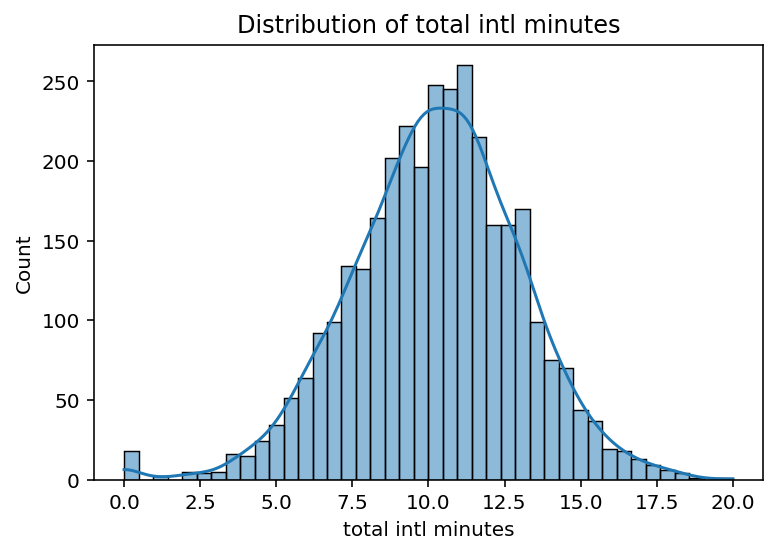

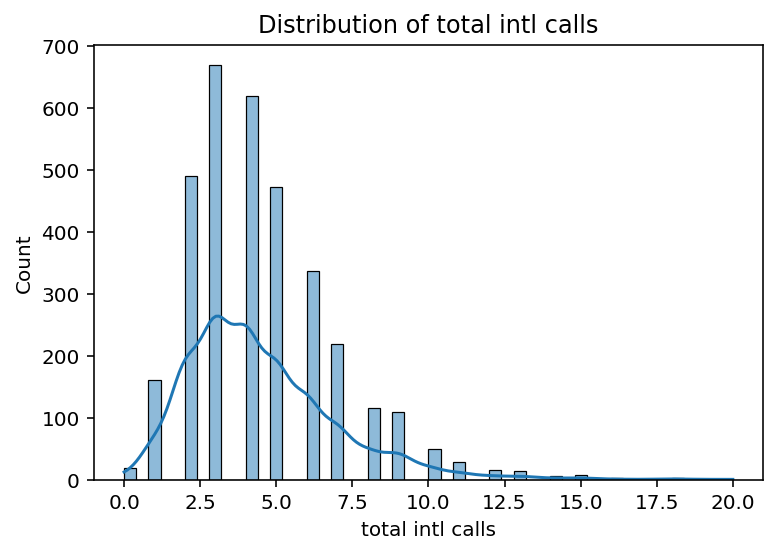

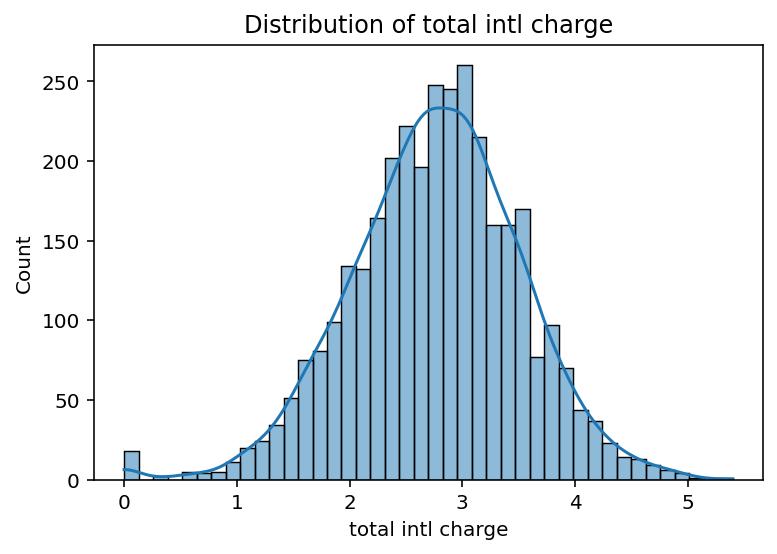

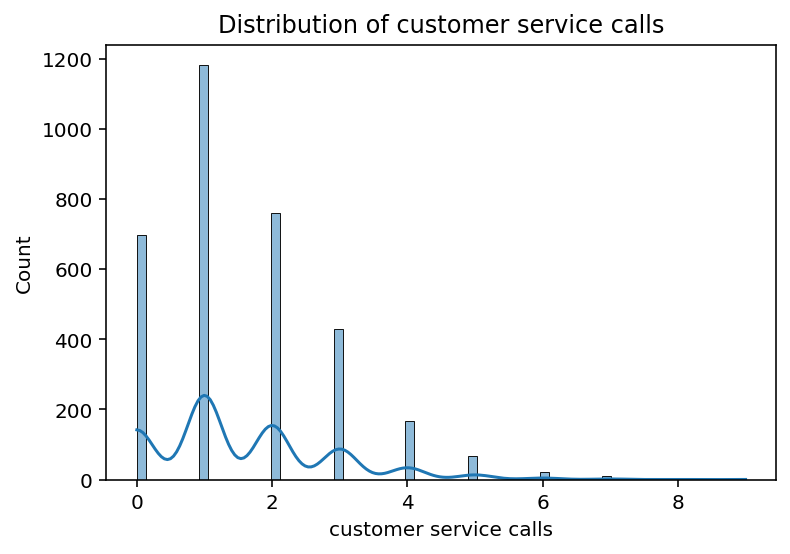

In [ ]:
# # Univariate Analysis for Continuous Features
for feature in continuous_cols:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

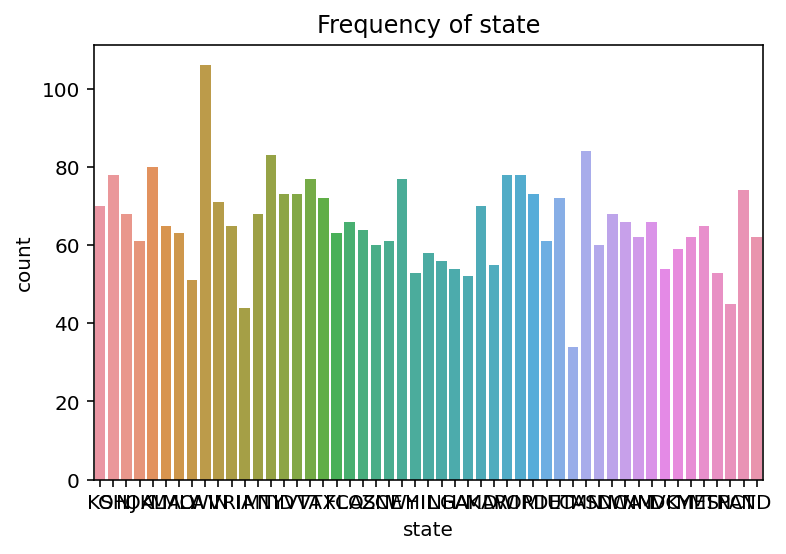

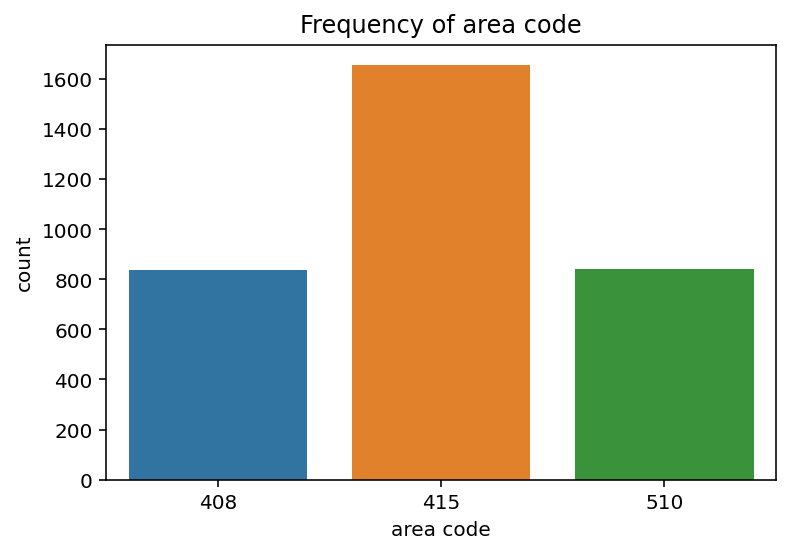

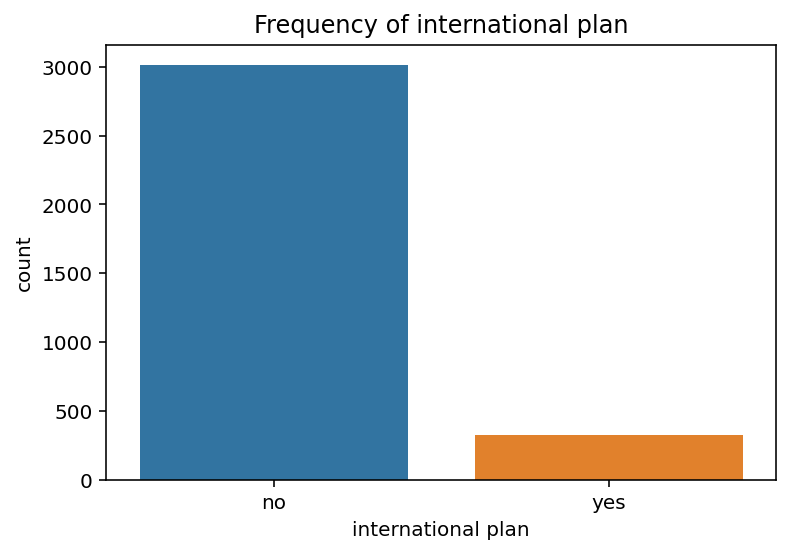

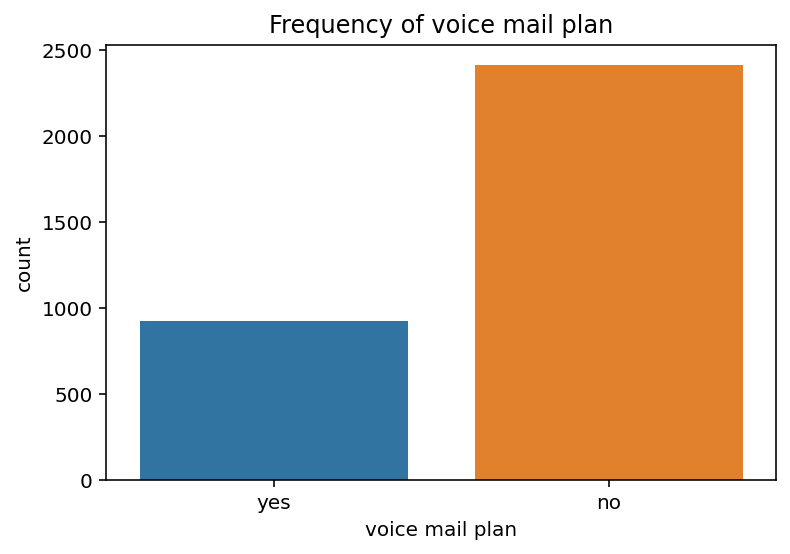

In [ ]:
# Univariate Analysis for Categorical Features
for feature in categorical_cols:
    sns.countplot(data=df, x=feature)
    plt.title(f'Frequency of {feature}')
    plt.show()

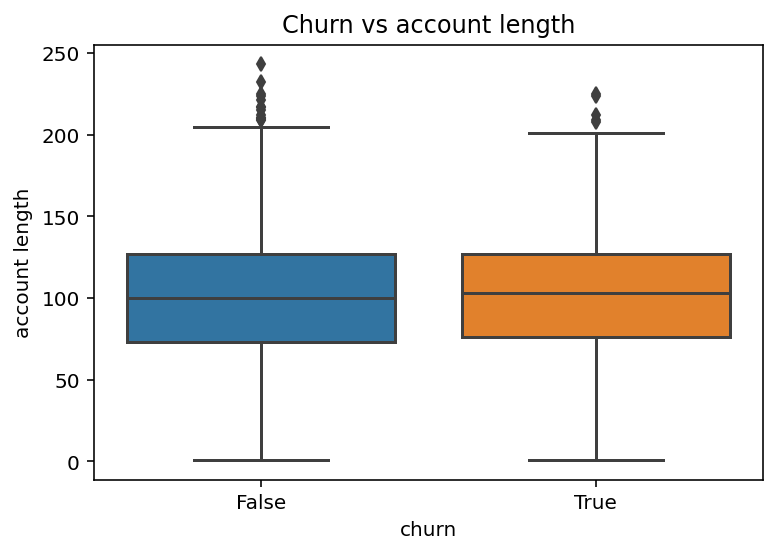

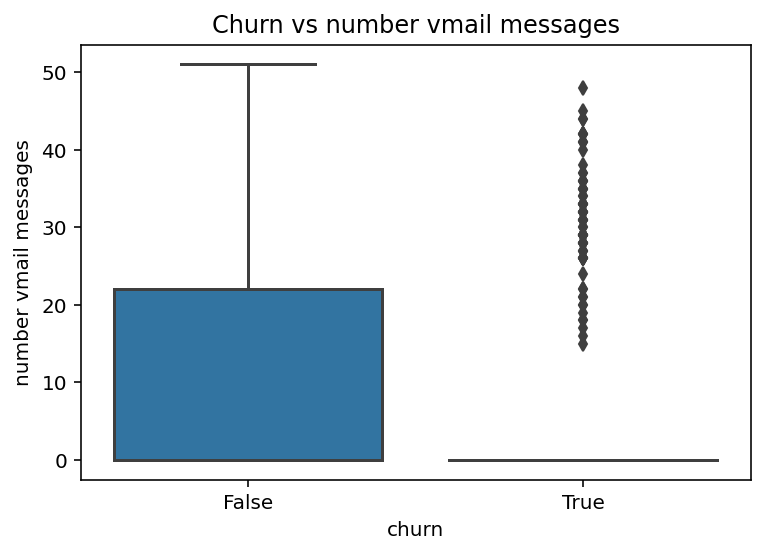

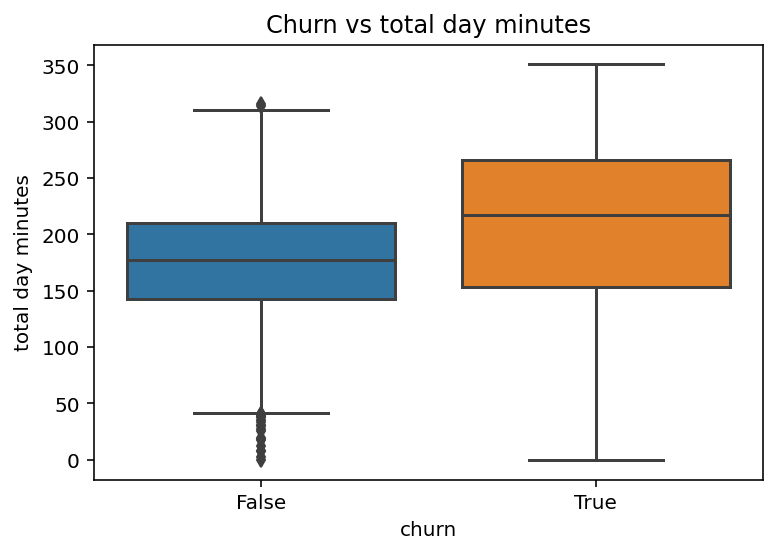

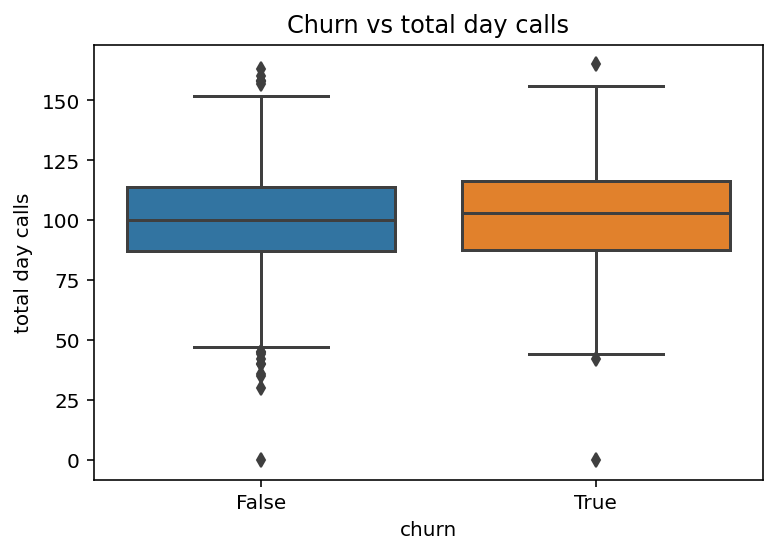

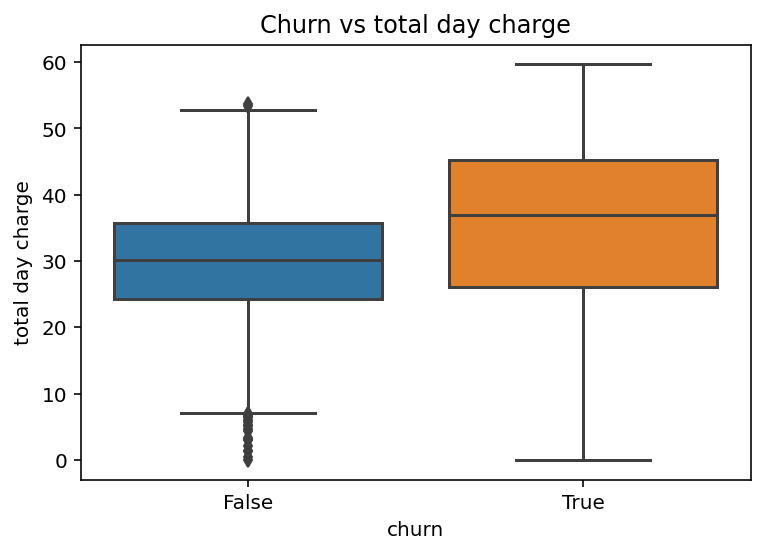

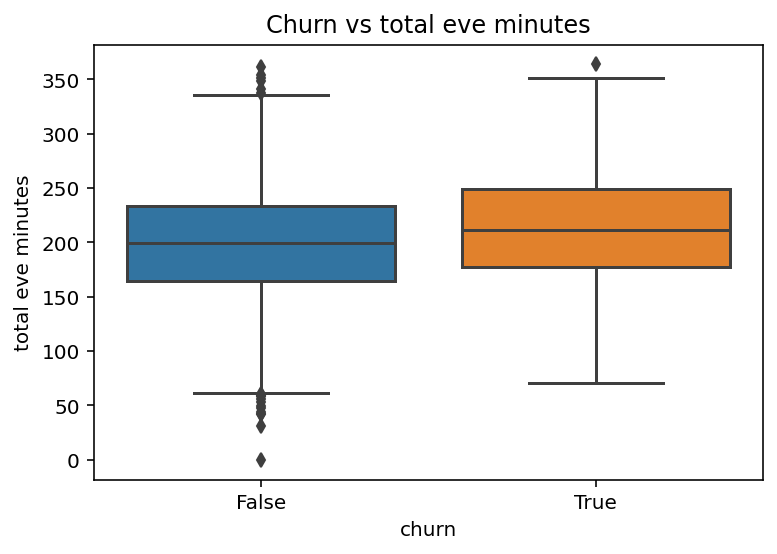

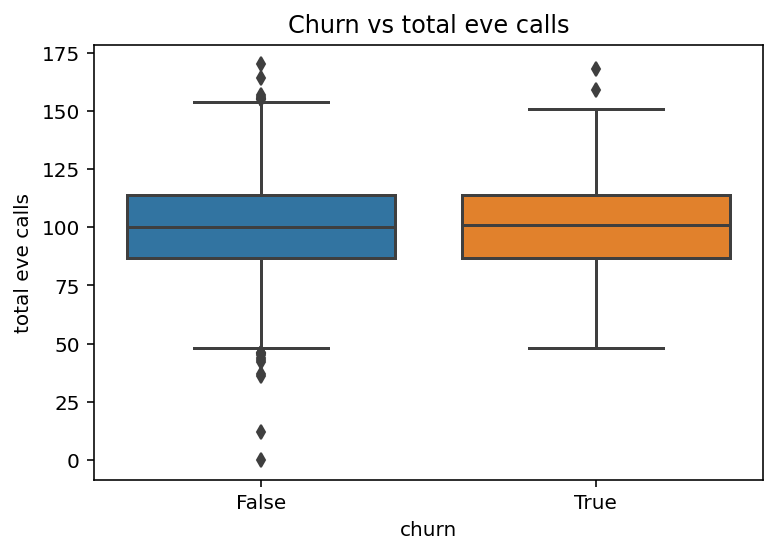

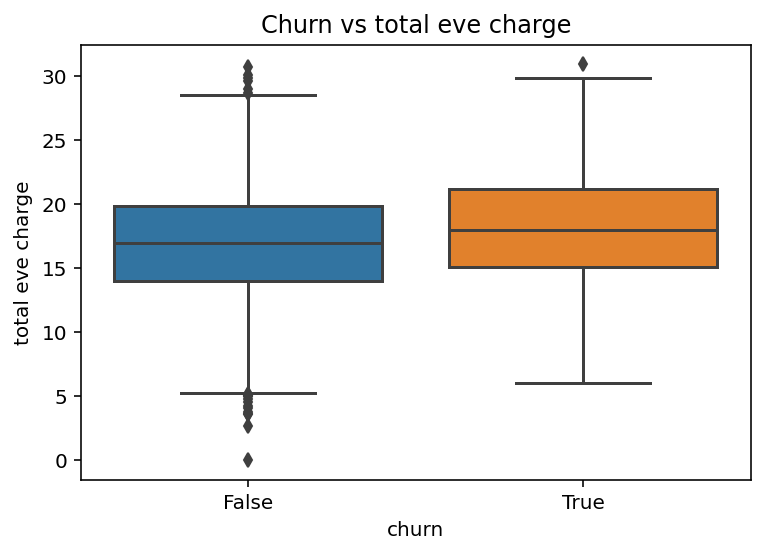

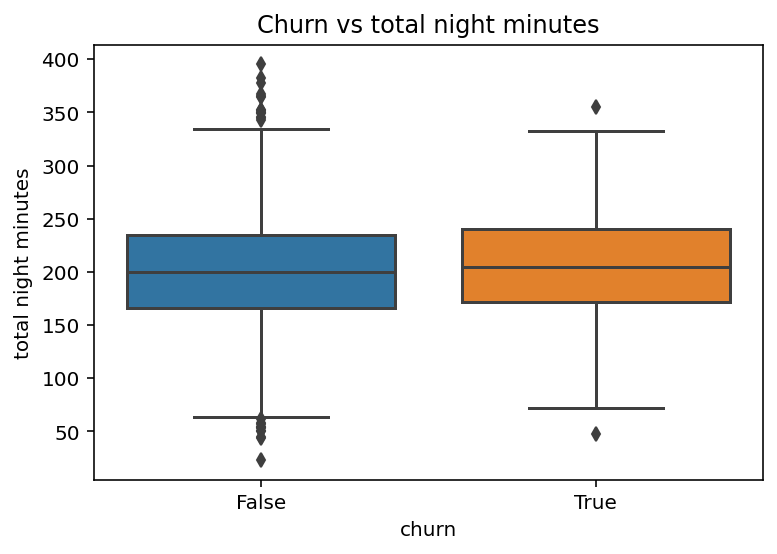

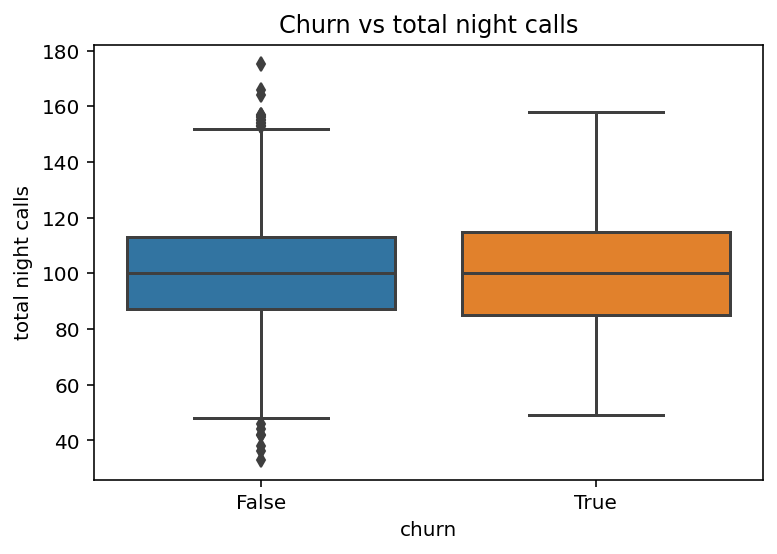

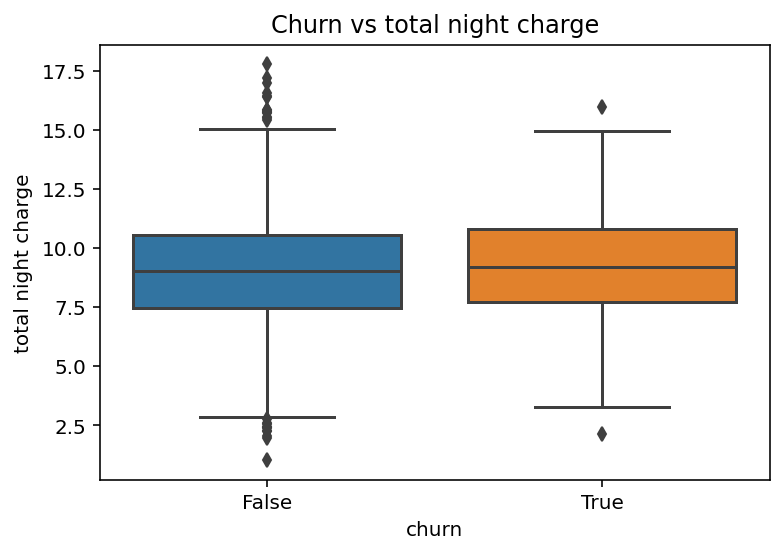

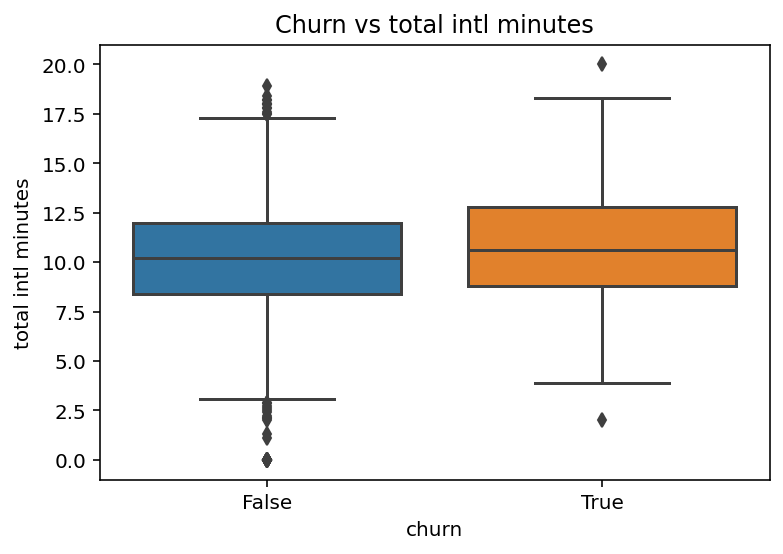

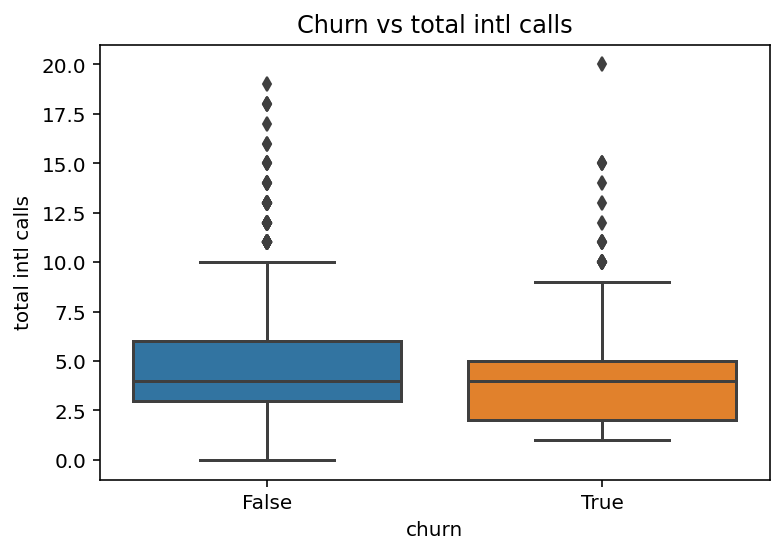

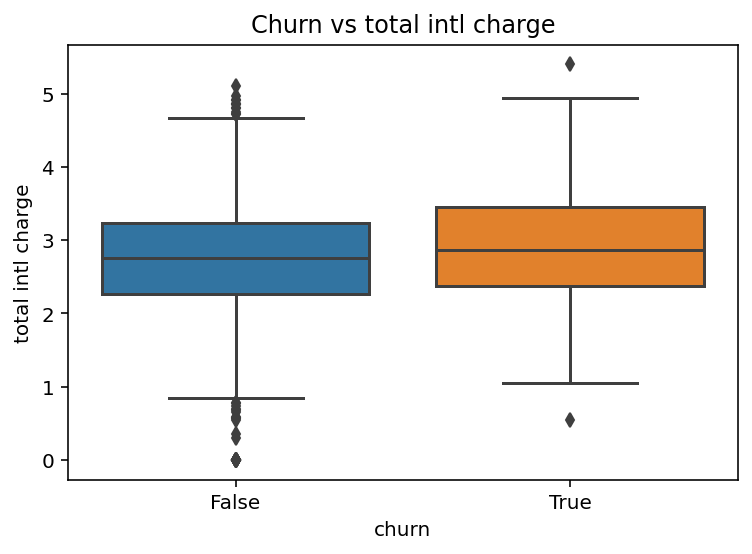

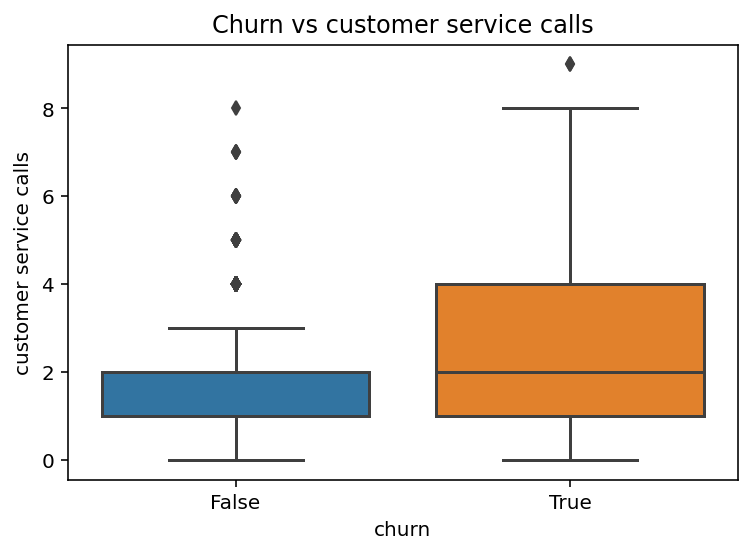

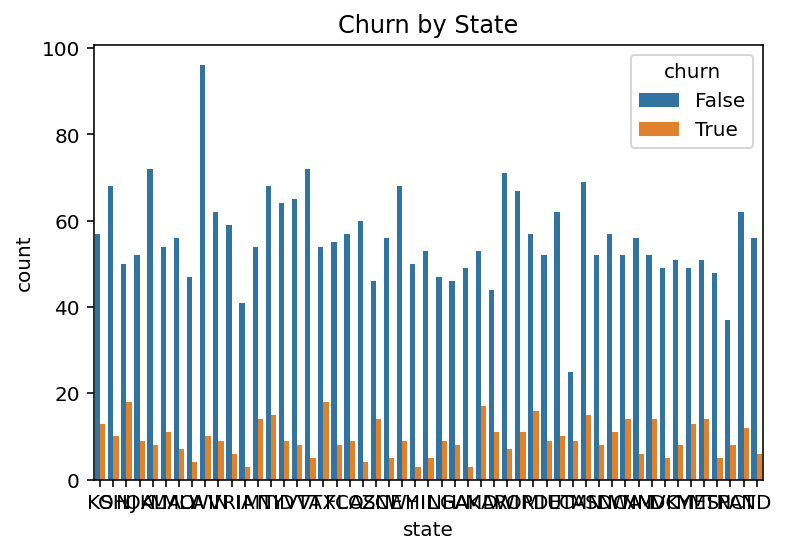

In [ ]:
# Categorical vs. Continuous
for feature in continuous_cols:
    sns.boxplot(data=df, x='churn', y=feature)
    plt.title(f'Churn vs {feature}')
    plt.show()

# Categorical vs. Categorical
sns.countplot(data=df, x='state', hue='churn')
plt.title('Churn by State')
plt.show()


Features Correlations with Churn

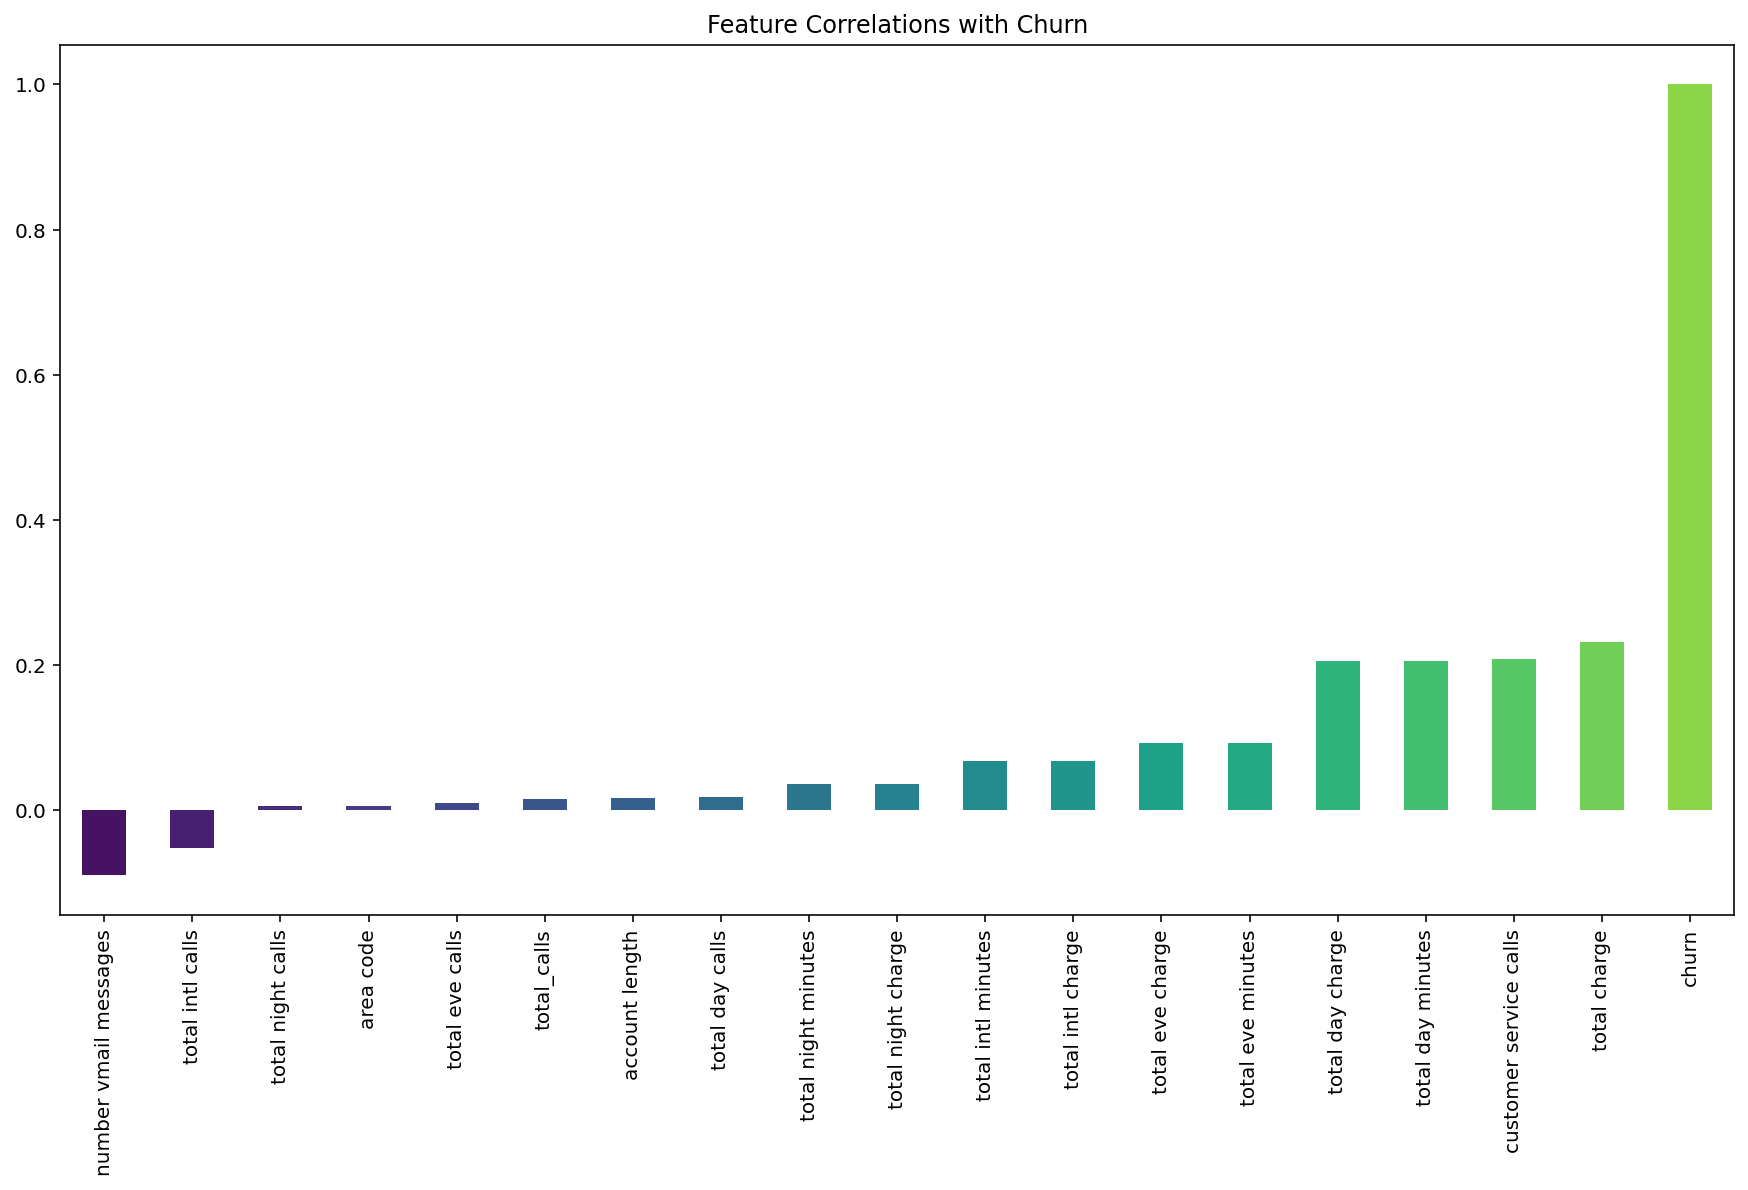

In [ ]:
# Let's see which columns are important.
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values().plot(kind='bar', color=sns.color_palette("viridis", len(df.columns)))
plt.title('Feature Correlations with Churn')
plt.show()

### Analysis on 'churn' Feature
* Churn will be used as the dependent variable in this analysis.
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account. 

False    2850
True      483
Name: churn, dtype: int64


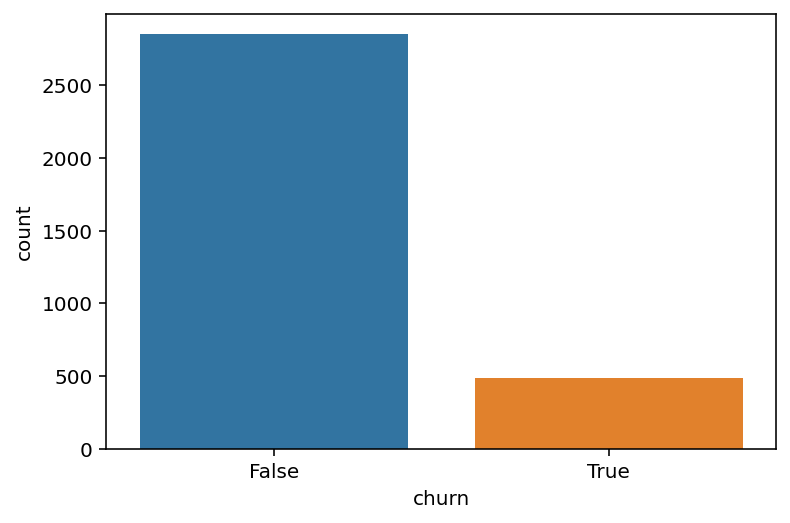

In [ ]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost. 
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

### Churn vs area code

In [ ]:
# pie chart of area code feature
figure = px.pie(df,
               values=df['area code'].value_counts().values,
               names=df['area code'].value_counts().index,
               hole=.1,
               title='Distribution of Area Code Feature')
figure.show()


* Half of the customers have the area code 415. 
* One fourth of customers have the area code 510 and another fourth have the area code 408.

churn rate percentages per area code

In [ ]:
#sum of churned customers and total customers per area
churn_sum_by_area = df.groupby('area code')['churn'].sum()
total_customers_by_area = df.groupby('area code')['churn'].count()

# Calculate the percentage of churned customers per area
churn_percentage_by_area = (churn_sum_by_area / total_customers_by_area * 100).reset_index()

# Combine total churned customers with the percentage of churned customers
churn_percentage_by_area['Total Churned Customers'] = churn_sum_by_area.values
churn_percentage_by_area.columns = ['Area Code', 'Total Churned Customers' ,'Churn Rate (%)' ]

# Display the churn rate percentages as a table
print(churn_percentage_by_area)

   Area Code  Total Churned Customers  Churn Rate (%)
0        408                14.558473             122
1        415                14.259819             236
2        510                14.880952             125


### Distrubution Plots for Continuous Features

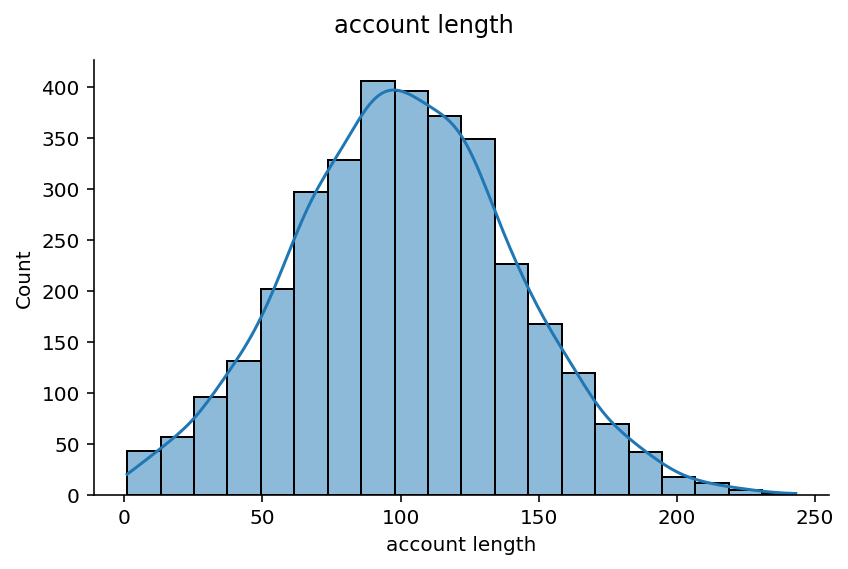

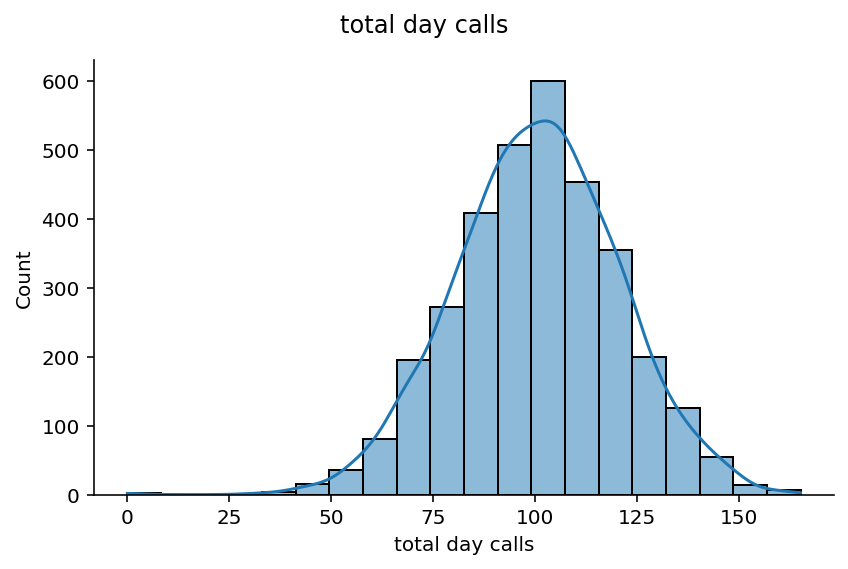

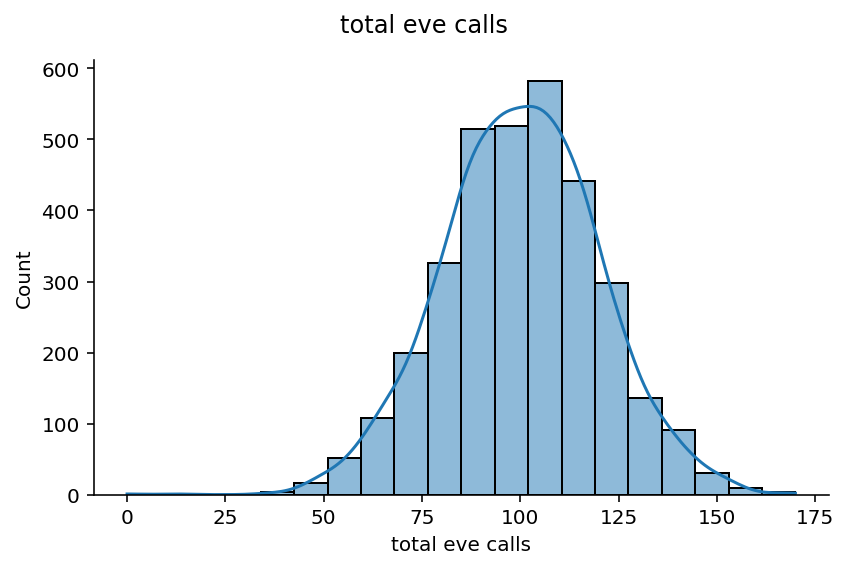

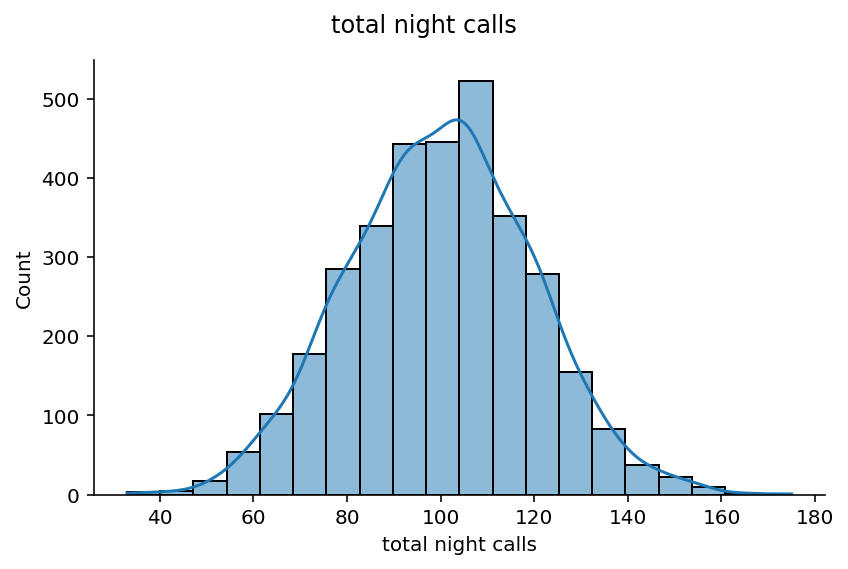

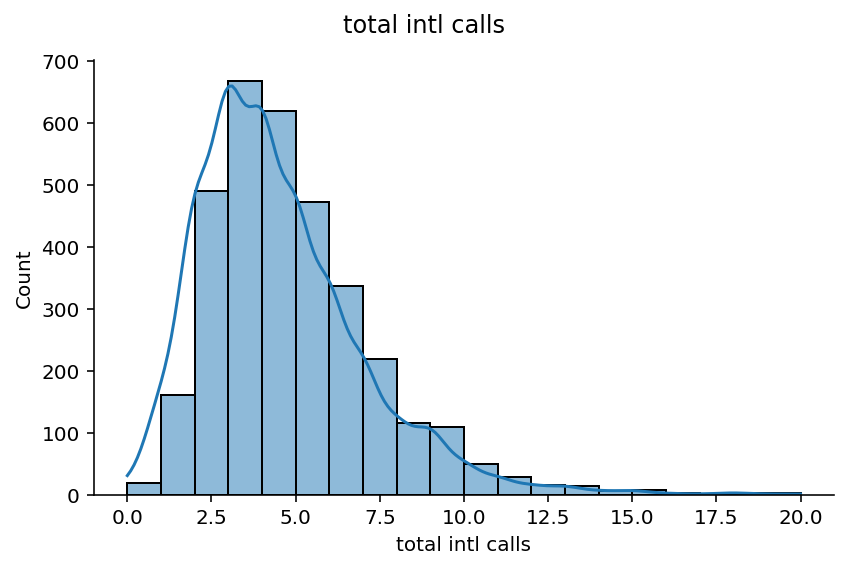

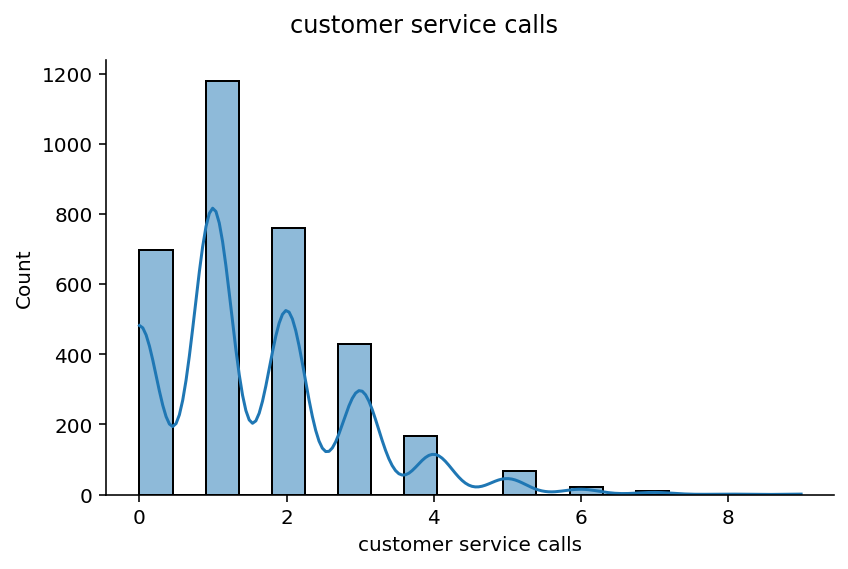

In [ ]:
# Replace infinite values with NaN and drop NaNs
df = df.replace([np.inf, -np.inf], np.nan).dropna()

def plot_distributions(data, features, bins=20):
    for feature in features:
        # Create the displot
        g = sns.displot(data[feature], bins=bins, kde=True, height=4, aspect=1.5)
        # Set the title for the plot
        g.fig.suptitle(feature)
        # Adjust layout to make room for the title
        g.fig.tight_layout()
        g.fig.subplots_adjust(top=0.9)
        # Display the plot
        display(g.fig)
        # Close the plot to ensure it's not chained
        plt.close(g.fig)

features = ["account length", "total day calls", "total eve calls", "total night calls", "total intl calls", "customer service calls"]
plot_distributions(df, features)

* For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed. 
* Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number. 

### Pairplots for Numeric Features in respect to the Churn feature

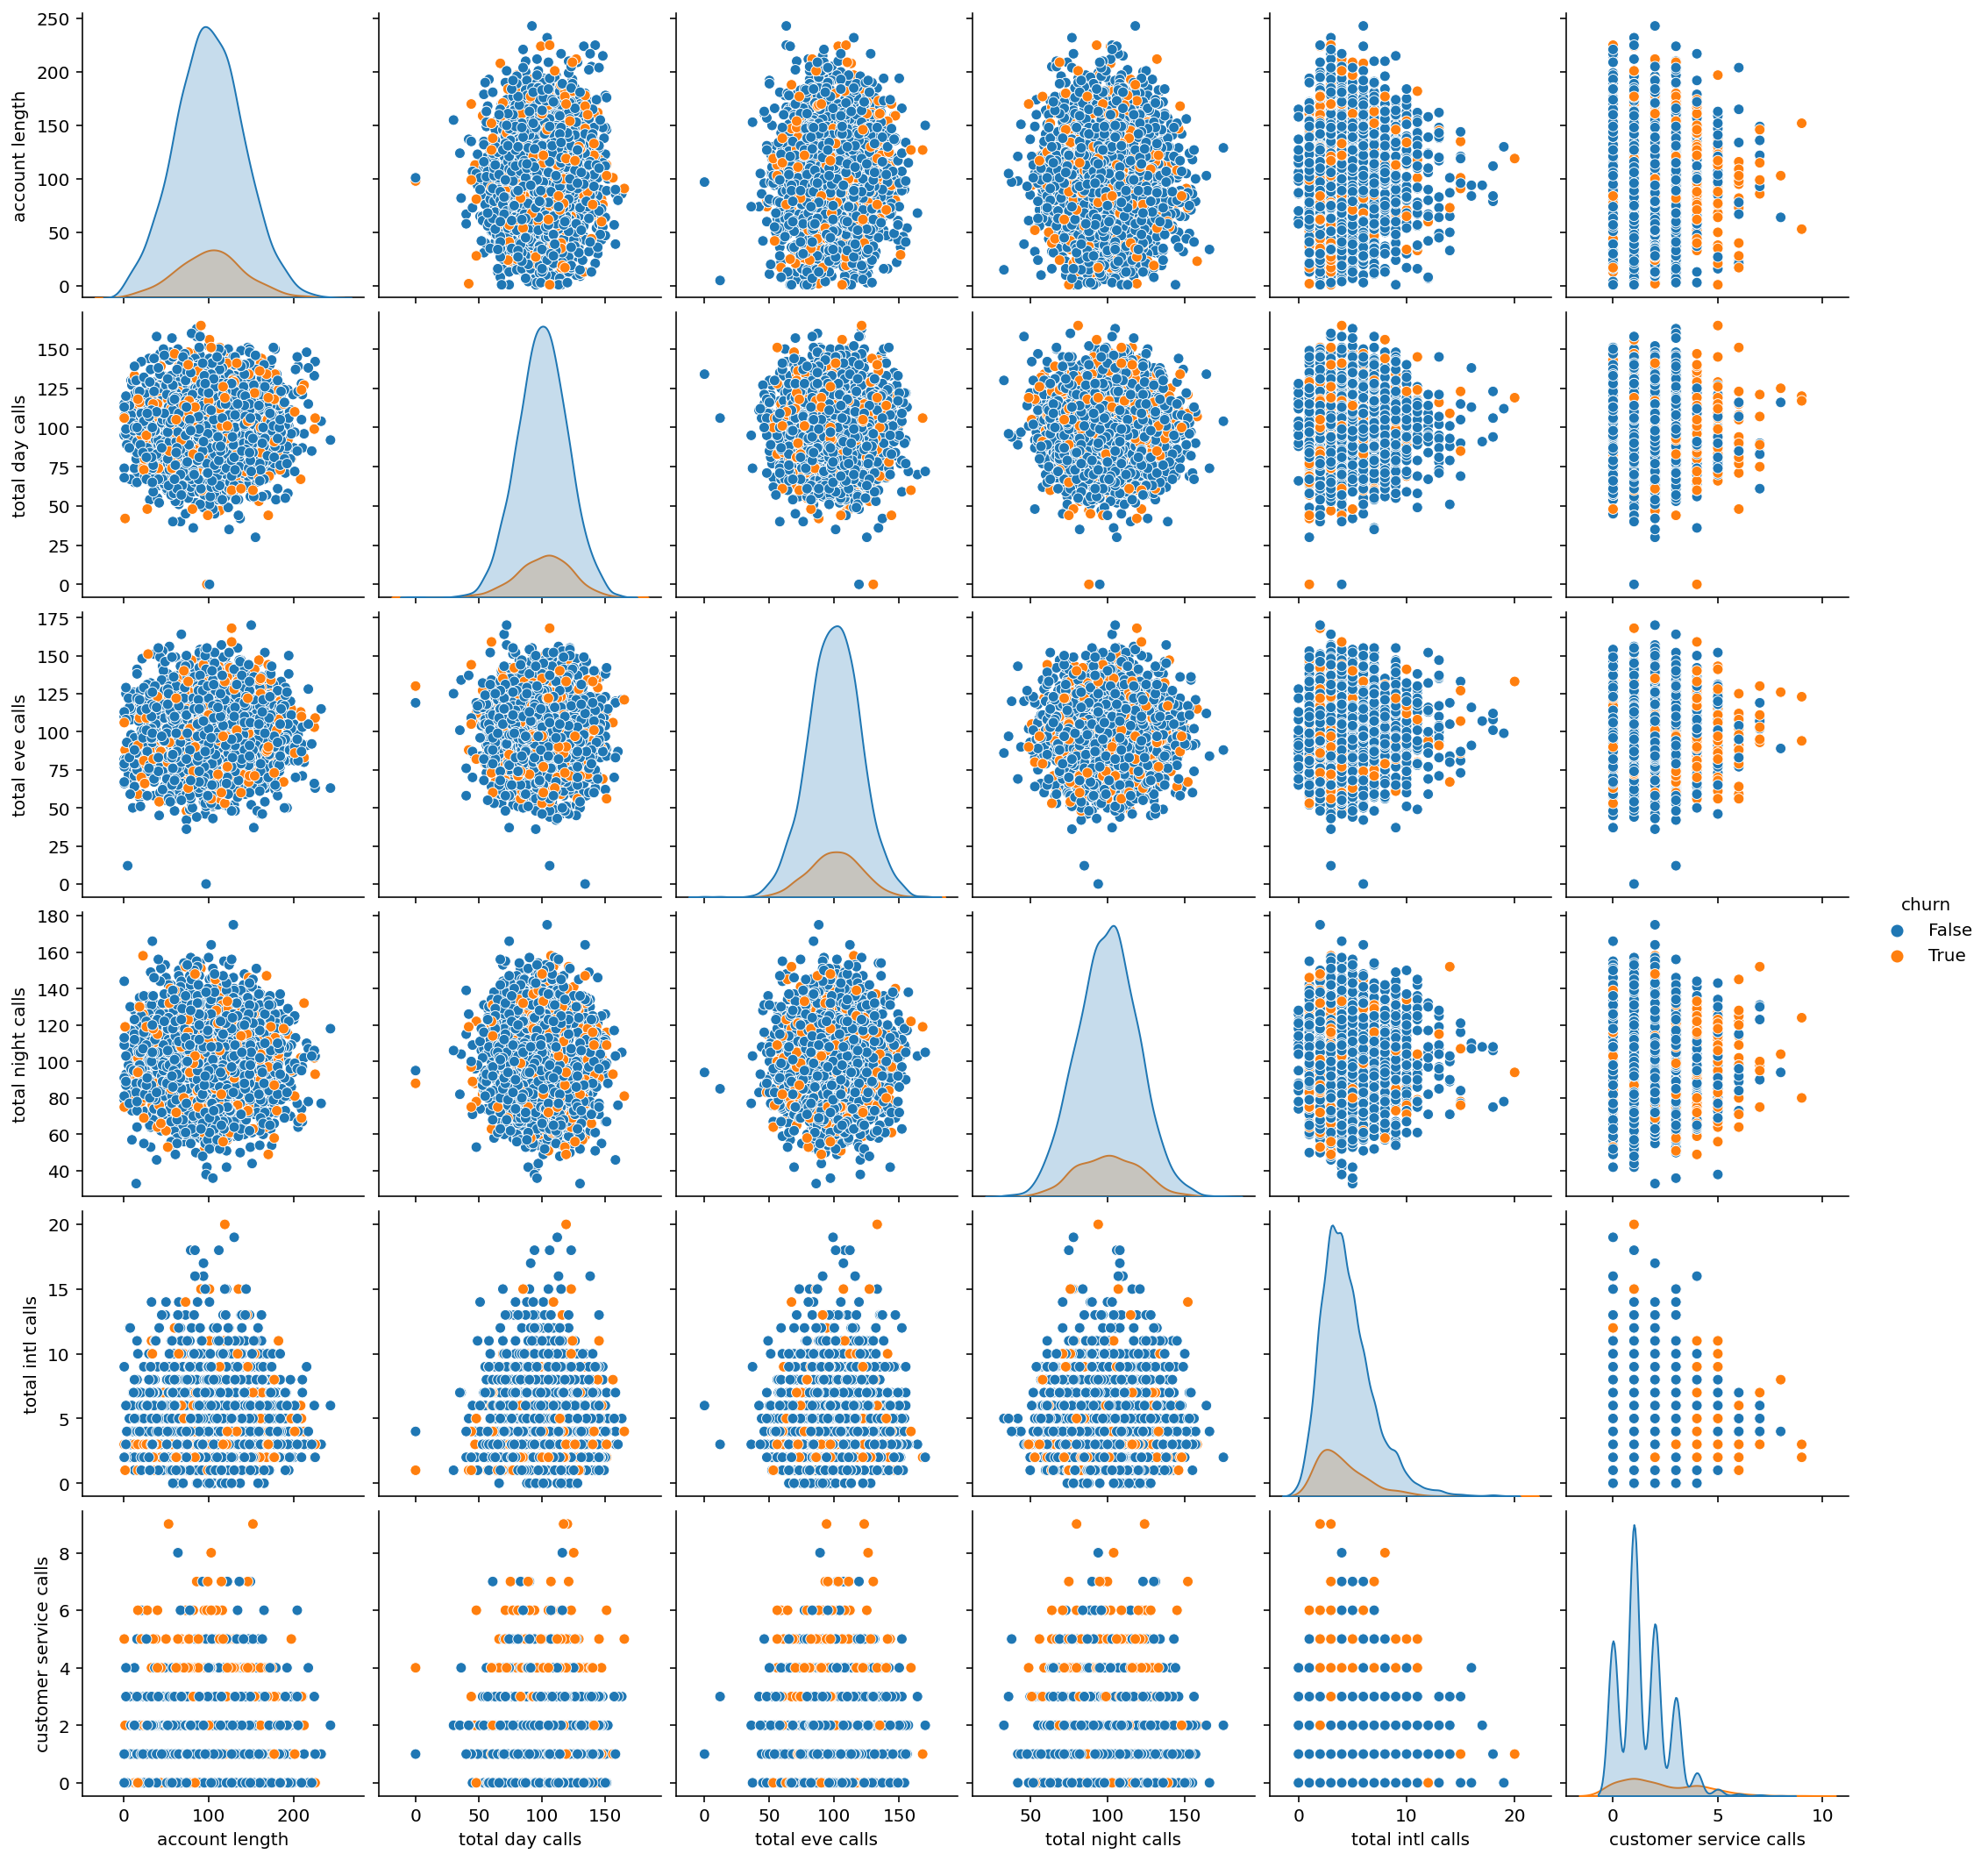

In [ ]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

- **Account Length**: 
  - Similar distributions for churned and non-churned customers.
  - Not a strong predictor of churn.

- **Total Day Calls**:
  - No clear distinction between churned and non-churned customers.
  - Likely a weak predictor of churn.

- **Total Eve Calls**:
  - Mixed distribution with no distinct pattern.
  - Suggests weak correlation with churn.

- **Total Night Calls**:
  - Similar distribution across churned and non-churned customers.
  - Likely not a strong indicator of churn.

- **Total Intl Calls**:
  - Even distribution among churned and non-churned customers.
  - Unlikely to be a significant predictor of churn.

- **Customer Service Calls**:
  - Churned customers tend to have made more customer service calls.
  - Stronger predictor of churn compared to other variables.


In [ ]:
# Correlation with churn for continuous features
correlation = df[cont_cols].corrwith(df['churn']).sort_values(ascending=False)
print(correlation)


NameError: name 'cont_cols' is not defined

### Correlation Heatmap for Numeric Features

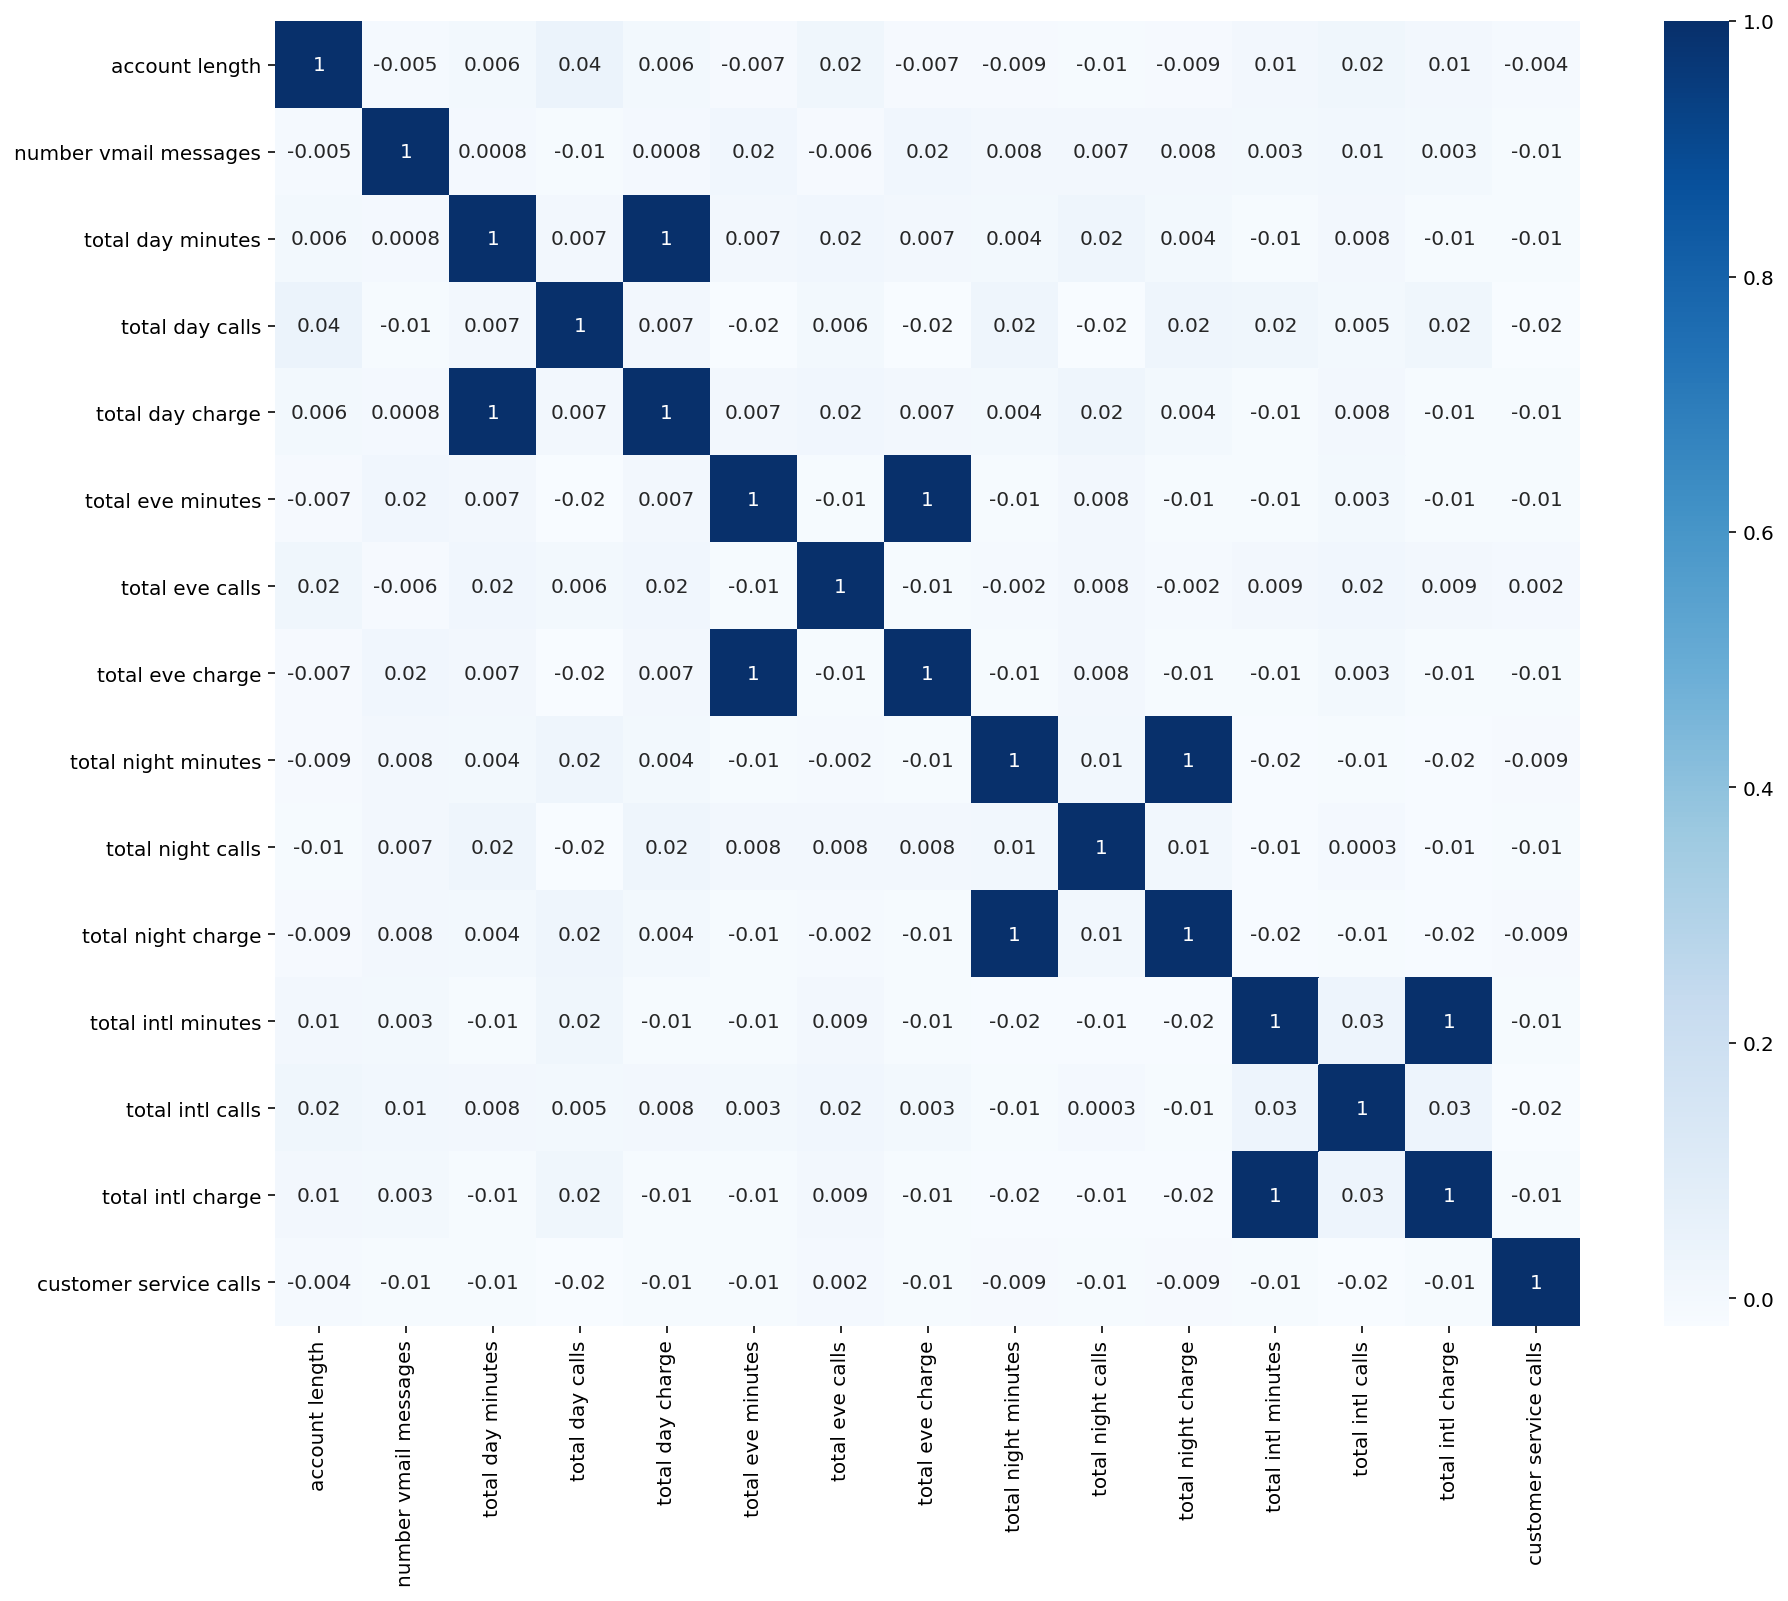

In [ ]:
corr_mat = df[cont_cols].corr()

plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* Most of the features are not correlated however some do share a perfect correlation. 
    * Total day charge and total day minutes features are fully positively correlated. 
    * Total eve charge and total eve minutes features are fully positively correlated.
    * Total night charge and total night minutes features are fully positively correlated. 
    * Total int charge and total int minutes features are fully positively correlated. 
* It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.   
* The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

### Categorical Features Analysis

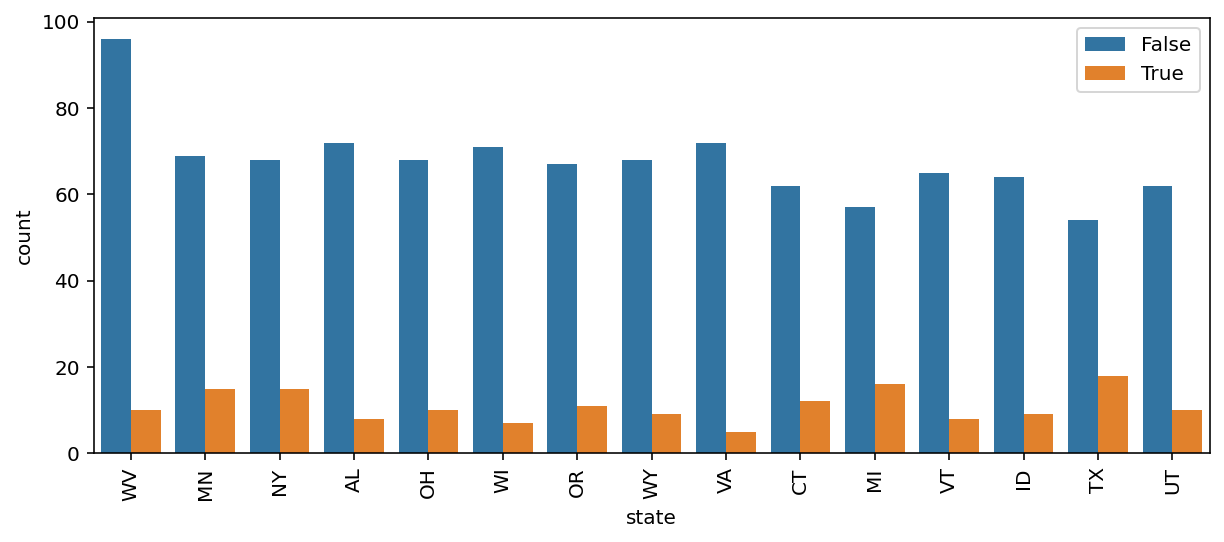

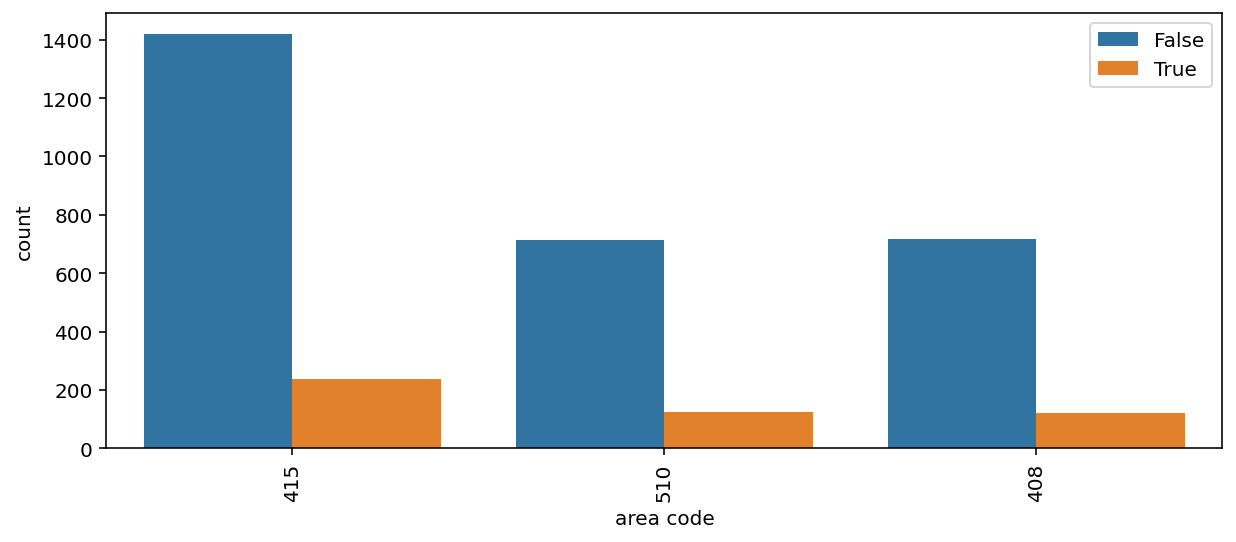

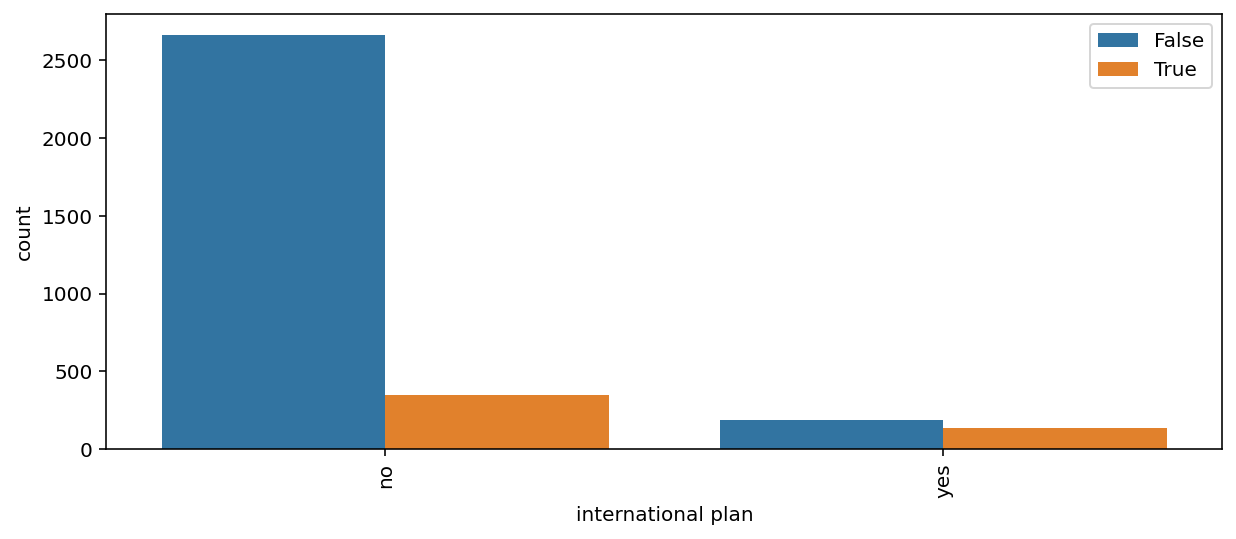

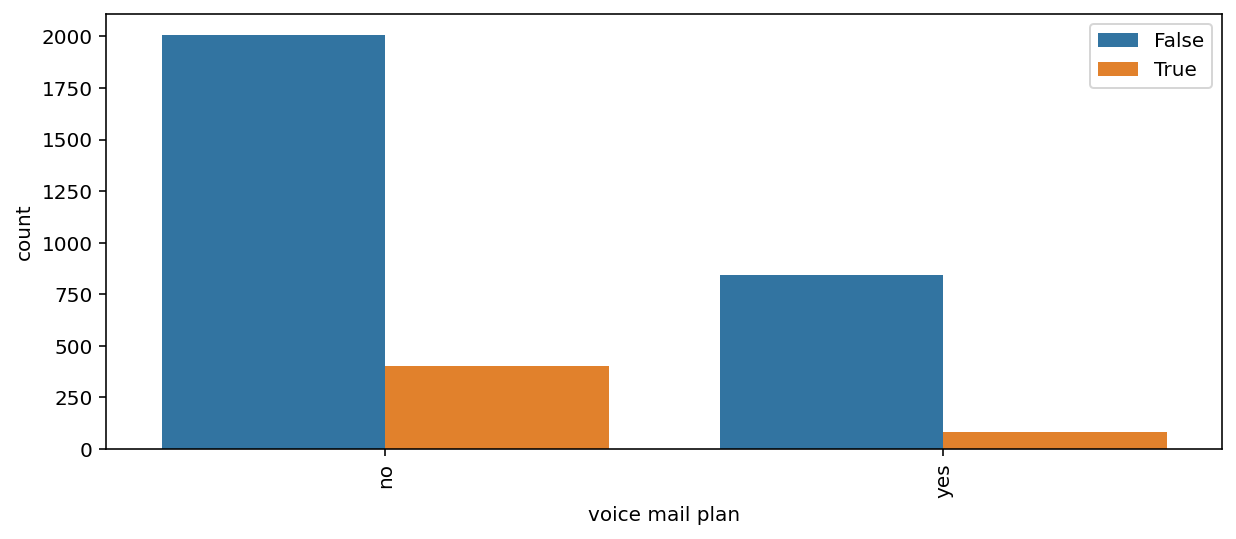

In [ ]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

### Outlier Detection & Treatment
* Dropping outliers past 3 standard deviations. 

In [ ]:
def drop_continuous_outliers_iqr(df, factor=1.5):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

print("DataFrame length before dropping outliers:", len(df))
df = drop_continuous_outliers_iqr(df)
print("DataFrame length after dropping outliers:", len(df))


DataFrame length before dropping outliers: 3333
DataFrame length after dropping outliers: 2773


### Dropping Highly-Correlated Features
* Dropping features that have a correlation of 0.9 or above. 

In [ ]:
# Display the number of columns in the original dataframe
print(f"The original dataframe contains {df.shape[1]} columns.")

# Compute the correlation matrix and take the absolute values
correlation_matrix = df.corr().abs()

# Generate a mask to cover the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
filtered_corr_matrix = correlation_matrix.mask(upper_triangle_mask)

# Identify columns with high correlation (r > 0.90) to drop
columns_to_drop = [column for column in filtered_corr_matrix.columns if any(filtered_corr_matrix[column] > 0.90)]

# Remove the highly correlated features
reduced_dataframe = df.drop(columns_to_drop, axis=1)
print(f"The reduced dataframe contains {reduced_dataframe.shape[1]} columns.")


The original dataframe contains 22 columns.
The reduced dataframe contains 18 columns.


### Transforming "Churn" Feature's Rows into 0s and 1s

In [ ]:
reduced_df['churn'].value_counts()

0.0    2723
1.0     440
Name: churn, dtype: int64

In [ ]:
reduced_df['churn'] = reduced_df['churn'].map({True: 1, False: 0}).astype('int') 
reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0               0.2           0.487585  ...          0.0          0.0   
1               0.2           0.713318  ...          0.0          0.0   
2               0.4           0.620767  ...          0.0          0.0   
3               0.6           0.279910  ...          0.0          0.0   
4               0.2           0.494357  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 70 columns]

### One-Hot Encoding
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [ ]:
# Create dummy variables for categorical columns and drop the original columns
reduced_df = pd.get_dummies(reduced_df, columns=["state", "area code", "international plan", "voice mail plan"],
                            dtype=np.int64, prefix=["state_is", "area_code_is", "international_plan_is", "voice_mail_plan_is"], 
                            drop_first=True)

# Remove any duplicated columns
reduced_df = reduced_df.loc[:, ~reduced_df.columns.duplicated()]

reduced_df.head()

KeyError: "None of [Index(['state', 'area code', 'international plan', 'voice mail plan'], dtype='object')] are in the [columns]"

### Scaling Numerical Features
* Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation issues will be solved.
* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to all numeric columns in the dataframe
numeric_columns = reduced_df.select_dtypes(include=[np.number]).columns
reduced_df[numeric_columns] = scaler.fit_transform(reduced_df[numeric_columns])

# Display the first few rows of the updated dataframe
reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0               0.2           0.487585  ...          0.0          0.0   
1               0.2           0.713318  ...          0.0          0.0   
2               0.4           0.620767  ...          0.0          0.0   
3               0.6           0.279910  ...          0.0          0.0   
4               0.2           0.494357  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 70 columns]

### Train-Test Split
* Splitting the dataset into training and testing as 75% training and 25% testing

In [ ]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature
* Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
* The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [ ]:
reduced_df.churn.value_counts()

0.0    2723
1.0     440
Name: churn, dtype: int64

In [ ]:
# Initialize SMOTE with specific parameters
smote = SMOTE(k_neighbors=5, random_state=123)

# Apply SMOTE to the training data
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Print the shapes of the data before and after oversampling
print(f'Before oversampling: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}')
print(f'After oversampling: X_train_over shape = {X_train_over.shape}, y_train_over shape = {y_train_over.shape}')


Before OverSampling, the shape of X_train: (2372, 69)
Before OverSampling, the shape of y_train: (2372,)
After OverSampling, the shape of X_train_over: (4088, 69)
After OverSampling, the shape of y_train_over: (4088,)


In [ ]:
y_train_over.value_counts()

1.0    2044
0.0    2044
Name: churn, dtype: int64

In [ ]:
# Get churn distribution
churn_distribution = reduced_df['churn'].value_counts()

# Draw a pie chart with Plotly
figure = px.pie(
    names=churn_distribution.index,
    values=churn_distribution.values,
    hole=0.5,
    title='Distribution of Churn - Before SMOTE'
)
figure.show()


In [ ]:
# Convert y_train_over to a DataFrame if it's not already
y_train_over_df = y_train_over.to_frame()

# Get the churn distribution after SMOTE
churn_distribution = y_train_over_df['churn'].value_counts()

# Draw a pie chart with Plotly
figure = px.pie(
    names=churn_distribution.index,
    values=churn_distribution.values,
    hole=0.5,
    title='Distribution of Churn - After SMOTE'
)
figure.show()


## Modeling

### Model 1 - Logistic Regression Classifier
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. 
* It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1. 
* This method will be used to create a baseline model.

In [ ]:
# Create and fit the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_over, y_train_over)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)


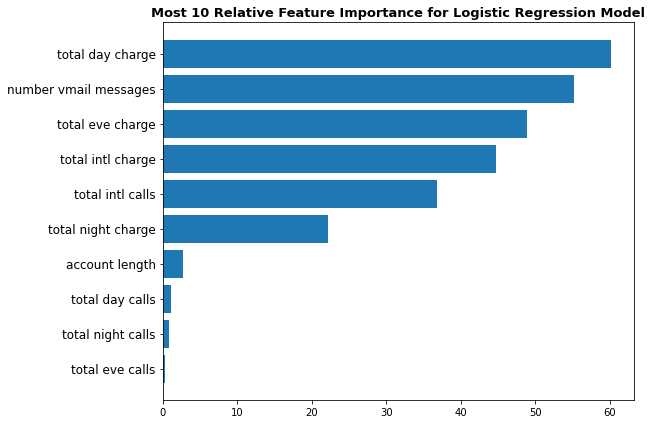

In [ ]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       679
           1       0.33      0.71      0.45       112

    accuracy                           0.76       791
   macro avg       0.64      0.74      0.65       791
weighted avg       0.85      0.76      0.79       791



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.75853
F1 score for testing set:  0.45272
Recall score for testing set:  0.70536
Precision score for testing set:  0.33333


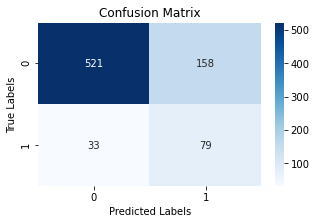

In [ ]:
# Print model evaluation metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print(f'Accuracy score for testing set: {accuracy_score(y_test, y_pred_lr):.5f}')
print(f'F1 score for testing set: {f1_score(y_test, y_pred_lr):.5f}')
print(f'Recall score for testing set: {recall_score(y_test, y_pred_lr):.5f}')
print(f'Precision score for testing set: {precision_score(y_test, y_pred_lr):.5f}')

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.show()

* According to the logistic regression classifier model, total day charge, number of voicemail messages and total evening charge are the top three important features.
* Model accuracy is 76.5%, which isn't bad. F1 score is only 50.2% which means the test will only be accurate half the times it is ran. 

### Model 3 - Decision Tree Classifier
* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.

In [ ]:
# Create and fit the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over, y_train_over)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

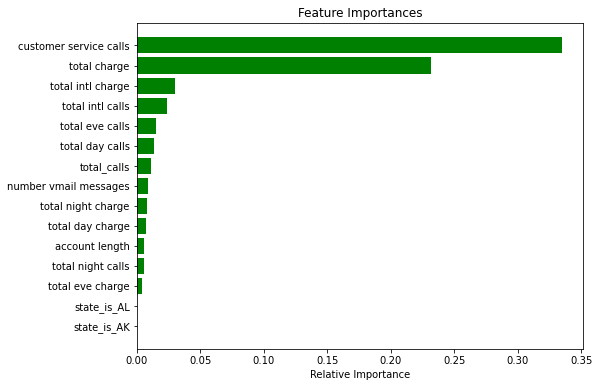

In [ ]:
# Get feature names and importances
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_

# Get indices of the top 15 features by importance
indices = np.argsort(importances)[-15:]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title('Top 15 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       679
           1       0.75      0.88      0.81       112

    accuracy                           0.94       791
   macro avg       0.86      0.91      0.89       791
weighted avg       0.95      0.94      0.94       791



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.94058
F1 score for testing set:  0.80658
Recall score for testing set:  0.875
Precision score for testing set:  0.74809


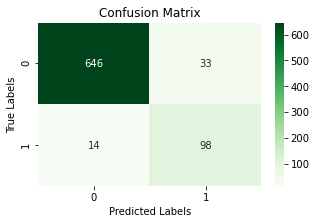

In [ ]:
# Print model evaluation metrics
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print(f'Accuracy score for testing set: {accuracy_score(y_test, y_pred_dt):.5f}')
print(f'F1 score for testing set: {f1_score(y_test, y_pred_dt):.5f}')
print(f'Recall score for testing set: {recall_score(y_test, y_pred_dt):.5f}')
print(f'Precision score for testing set: {precision_score(y_test, y_pred_dt):.5f}')

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], rotation=0)
plt.tight_layout()
plt.show()

* According to the decision tree classifier, customer service calls total day charge and total evening charge are the three most important for the model.
* The accuracy and F1 score for this model is not as great as model 2.

## Models Comparison

### ROC Curve

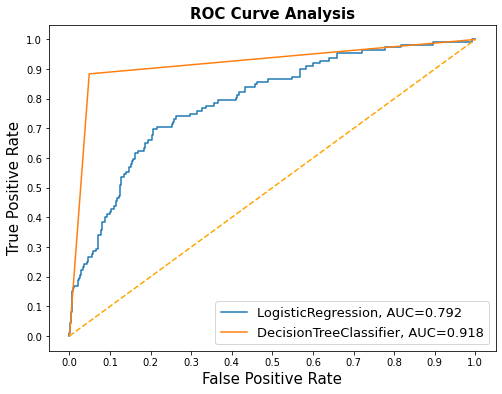

In [ ]:


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_cuclassifiers = [LogisticRegression(),
               DecisionTreeClassifier()]
rve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

In [ ]:
# Define classifiers
classifiers = [LogisticRegression(), DecisionTreeClassifier()]
classifiers_names = ['Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for clf, name in zip(classifiers, classifiers_names):
    model = clf.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name}, AUC={auc:.3f}')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

### Model Comparisons - F1 Score (10-fold cross-validated)

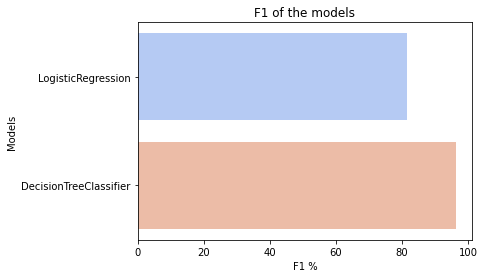

In [ ]:
models = [lr,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models');

In [ ]:
results.sort_values(by="F1",ascending=False)

Models         F1
0  DecisionTreeClassifier  96.475603
0      LogisticRegression  81.610768

* F1 score measures the harmonic mean between precision and recall
* It is a value between 0 and 1, with 1 being a perfect score and an indication everything was observed correctly. 
* Random forest classifier had the highest F1 score.
false negative have more of a business impact. need to focus on recall

In [ ]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    
    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)
    
    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })
    
    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

TypeError: cannot unpack non-iterable LogisticRegression object

### Model Comparisons - Accuracy (10-fold cross-validated)

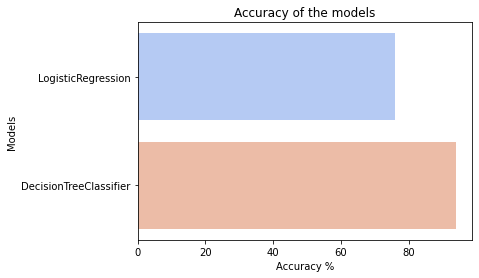

In [ ]:
models = [lr,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

In [ ]:
results.sort_values(by="Accuracy",ascending=False)

Models   Accuracy
0  DecisionTreeClassifier  94.058154
0      LogisticRegression  75.853350

* Accuracy allows one to measure the total number of prediction a model gets right. 
* The best performing model will have the highest accuracy. 
* Of the four models tested, random forest classifier has the highest accuracy.